In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data

df = pd.read_csv('/Users/yukthabhadane/Documents/Climate Finance Thesis/Data/v5_power_Forward_Analytics2024.csv')

# Create a color mapping for consistency

professional_palette = ['#4e79a7', '#f28e2c', '#e15759', '#76b7b2', '#59a14f',
                        '#edc949', '#af7aa1', '#ff9da7', '#B0E0E6', '#bab0ab']

# Ensure we have enough colors
while len(professional_palette) < len(df['subsector'].unique()):
    professional_palette += professional_palette

color_mapping = dict(zip(df['subsector'].unique(), professional_palette))

# Update the color mapping to include groups
group_colors = sns.color_palette("pastel", 3)
additional_mapping = {'Fossil Fuels': group_colors[0], 'Renewables': group_colors[1], 'Other': group_colors[2]}
color_mapping.update(additional_mapping)

# Define fuel groups
fossil_fuels = ['Coal', 'Oil', 'Gas']
renewables = ['Solar', 'Wind', 'Hydropower', 'Geothermal ']
others = ['Nuclear', 'Bioenergy', 'Other']

# Function to create a pie chart with legend
def create_pie_chart(data, title, colors):
    plt.figure(figsize=(12, 8))
    wedges, texts, autotexts = plt.pie(data.values, labels=data.index, autopct='%1.1f%%', colors=[color_mapping[x] for x in data.index])
    plt.title(title, pad=20)  # Add padding to the title
    plt.axis('equal')
    
    # Add legend
    plt.legend(wedges, data.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.tight_layout()
    plt.show()

# Function to add value labels on bar plots
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = f"{y_value:.1f}"
        ax.annotate(label, (x_value, y_value), xytext=(0, space),
                    textcoords="offset points", ha='center', va=va)

# Function to create a table from a DataFrame
def create_table(df, title):
    print(f"\n{title}")
    print(df.to_string(index=True))
    print("\n")  # Add an extra newline for spacing


2. Total number of operating global power plants: 79797

Total number & % of operating global power plants of each type:
             Count  Percentage
subsector                     
Solar        38589        48.4
Wind         19048        23.9
Gas           8043        10.1
Coal          6823         8.6
Hydropower    3430         4.3
Bioenergy     1679         2.1
Oil           1159         1.5
Nuclear        564         0.7
Geothermal     384         0.5
Other           78         0.1




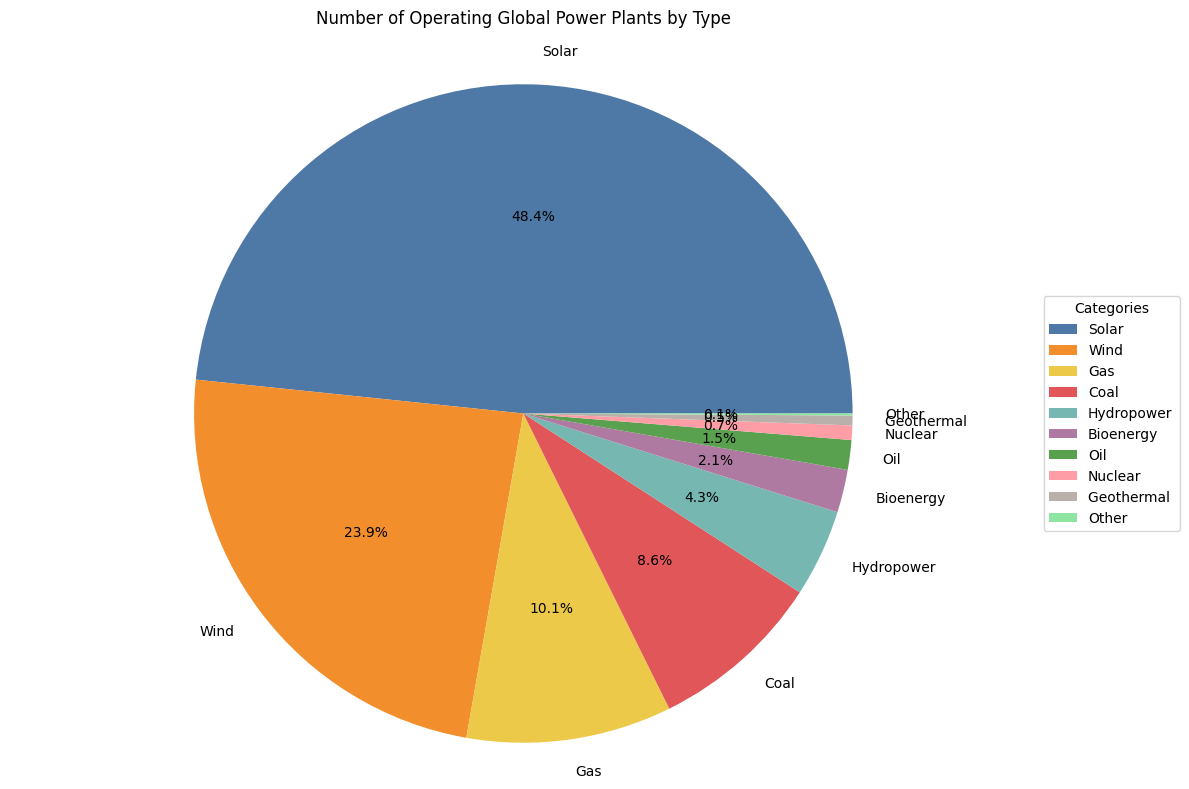


Capacity, Used capacity, and Emissions of operating plants:
             Capacity (GW)  Capacity %  Used Capacity (GW)  Used Capacity %  Emissions (gigatonnes)  Emissions %
subsector                                                                                                       
Bioenergy        86.108500         0.9           42.431110              1.1                0.000000          0.0
Coal           2281.266900        24.7         1138.813083             29.5               10.084710         71.2
Gas            1931.802040        20.9          884.822562             22.9                3.410460         24.1
Geothermal       15.819500         0.2           11.966790              0.3                0.000000          0.0
Hydropower     2195.325000        23.7          898.654976             23.3                0.000000          0.0
Nuclear         550.405000         6.0          441.307600             11.4                0.000000          0.0
Oil             152.774561         

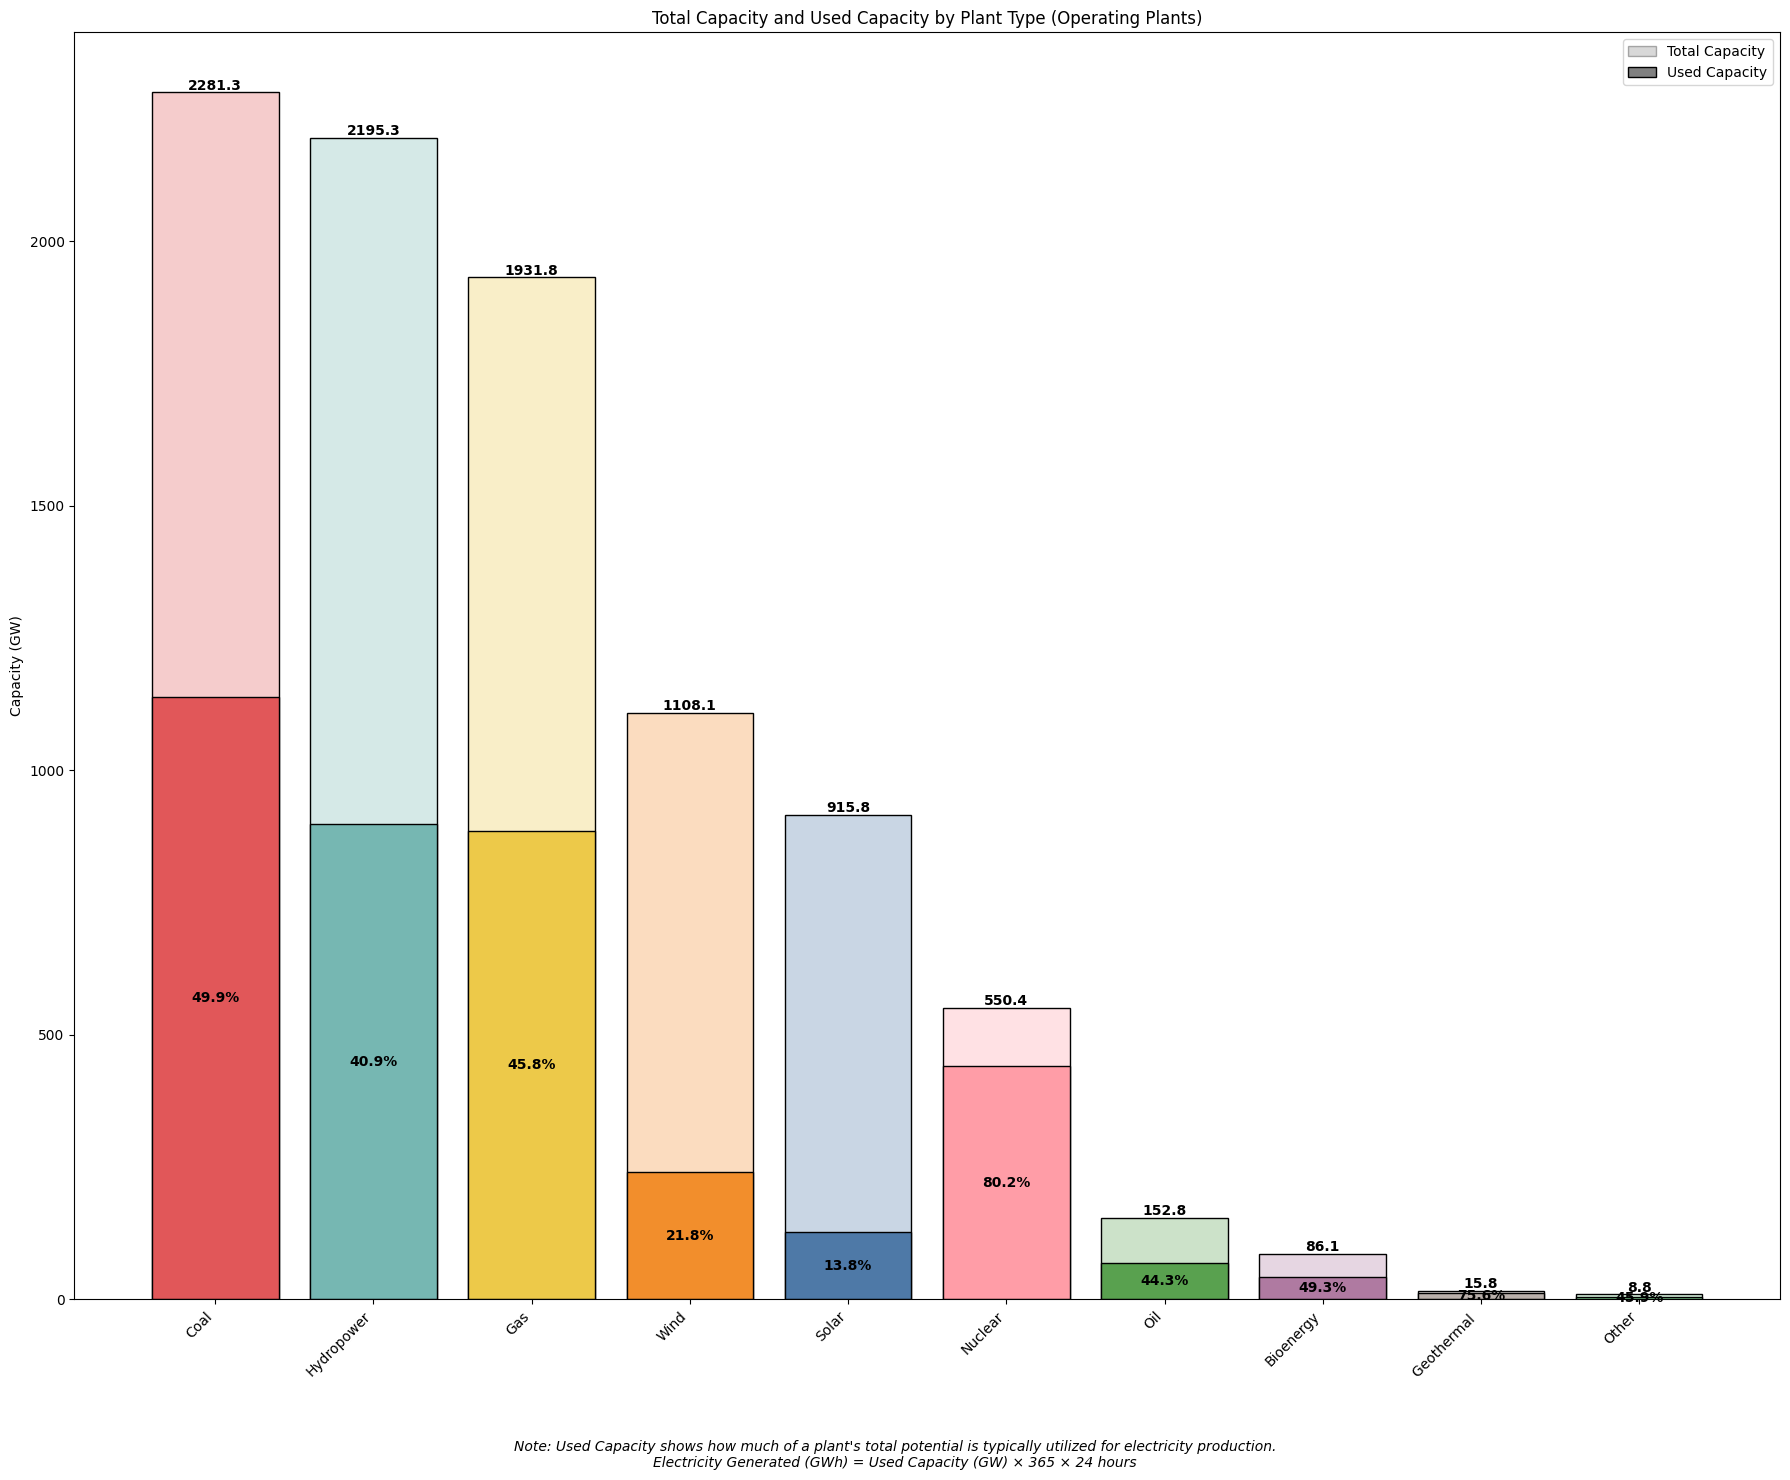


3a. Used Capacity, Total Capacity, and Used Capacity % by Fuel Type:
             Used Capacity (GW)  Total Capacity (GW)  Used Capacity %
subsector                                                            
Coal                1138.813083          2281.266900             49.9
Hydropower           898.654976          2195.325000             40.9
Gas                  884.822562          1931.802040             45.8
Wind                 241.089981          1108.068270             21.8
Solar                126.379357           915.822900             13.8
Nuclear              441.307600           550.405000             80.2
Oil                   67.748076           152.774561             44.3
Bioenergy             42.431110            86.108500             49.3
Geothermal            11.966790            15.819500             75.6
Other                  4.051524             8.829420             45.9




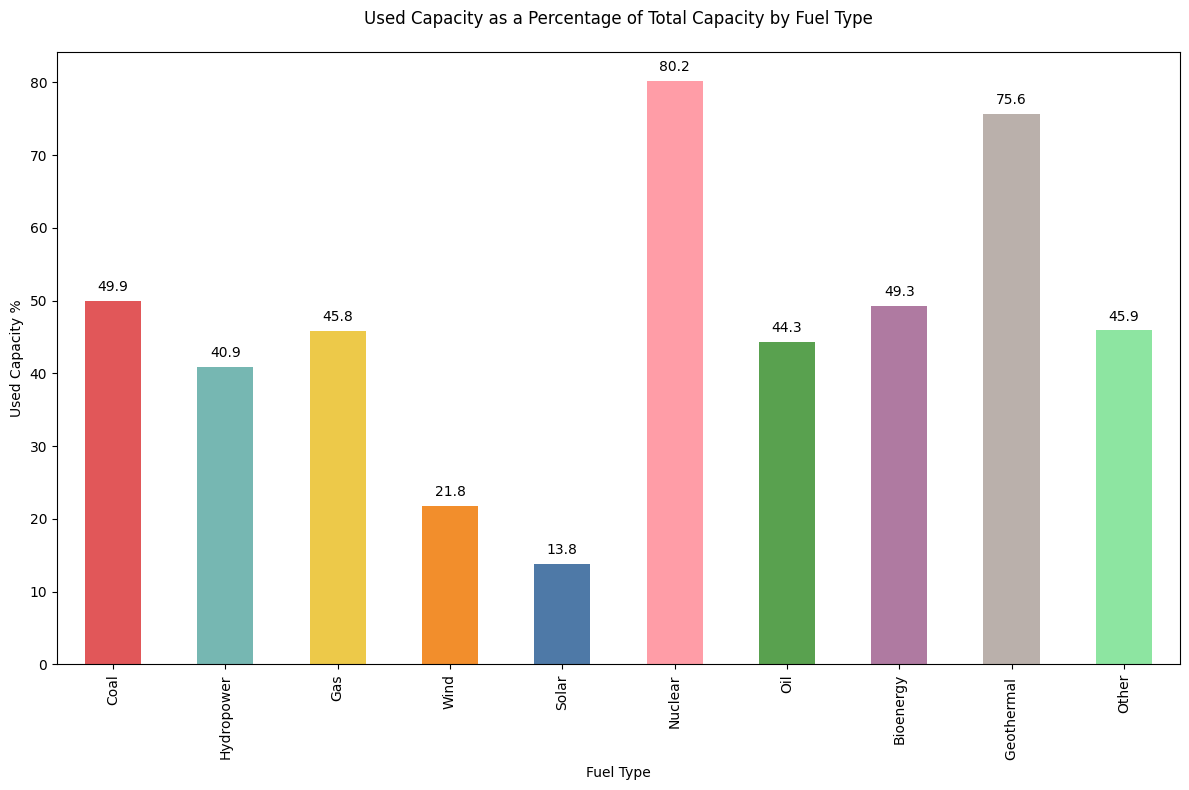


3. Total capacity, Used capacity, Used Capacity %, and Emissions by fuel type:
             Total Capacity (GW)  Used Capacity (GW)  Used Capacity %  Emissions (gigatonnes)
subsector                                                                                    
Bioenergy              86.108500           42.431110             49.3                0.000000
Coal                 2281.266900         1138.813083             49.9               10.084710
Gas                  1931.802040          884.822562             45.8                3.410460
Geothermal             15.819500           11.966790             75.6                0.000000
Hydropower           2195.325000          898.654976             40.9                0.000000
Nuclear               550.405000          441.307600             80.2                0.000000
Oil                   152.774561           67.748076             44.3                0.640951
Other                   8.829420            4.051524             45.9     

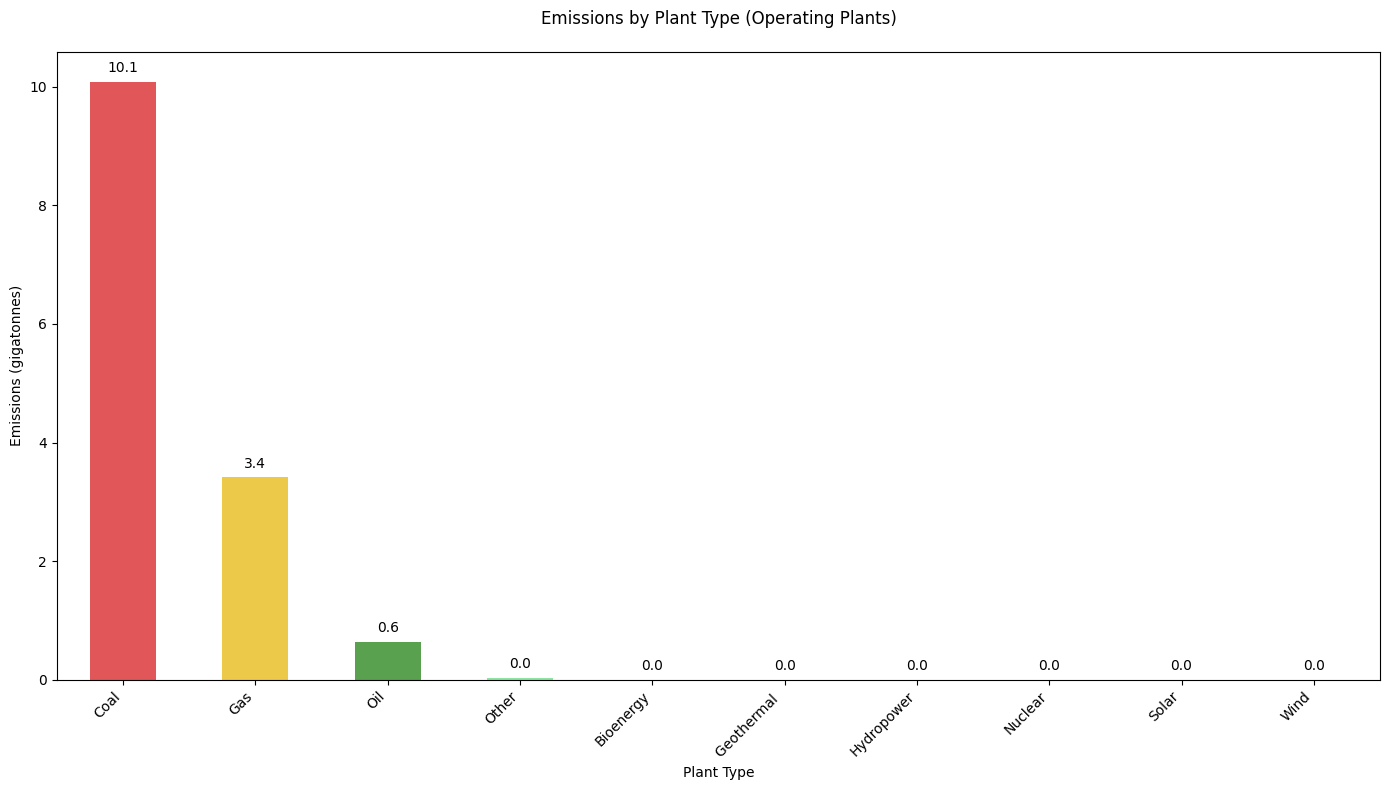

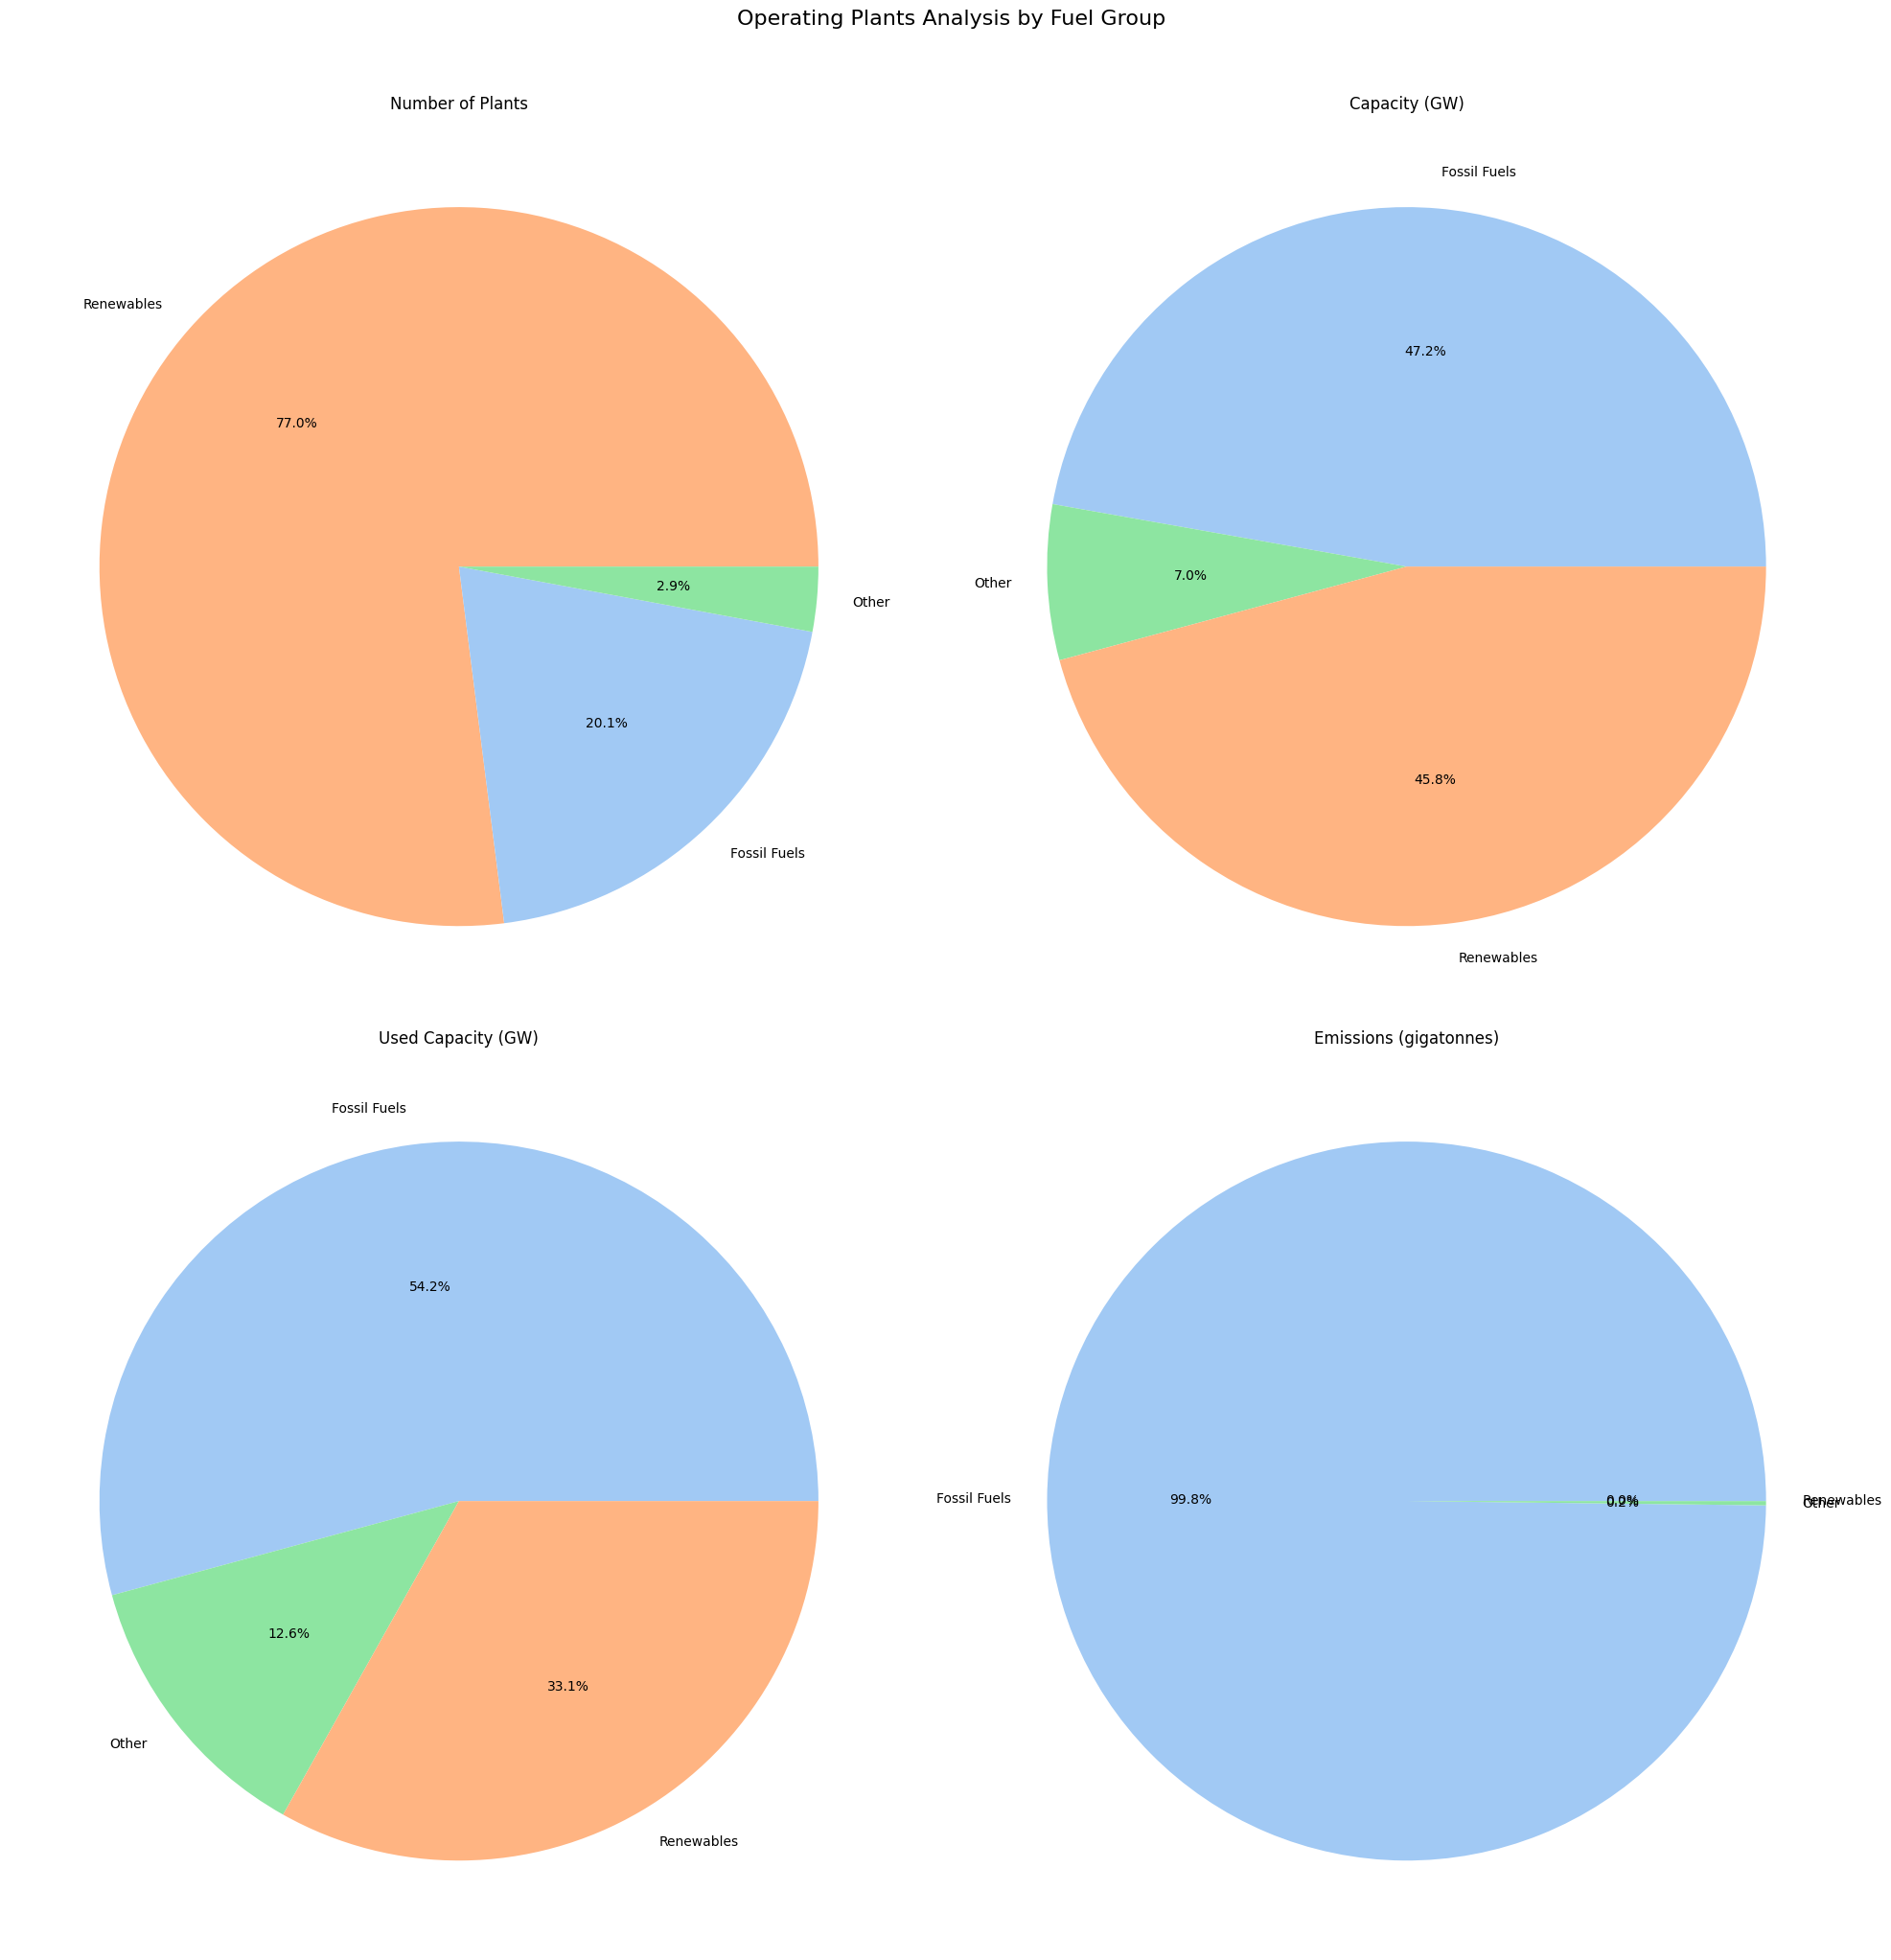

In [71]:
# Block 3 

operating_df = df[df['status'] == 'operating']

total_operating = len(operating_df)
print(f"\n2. Total number of operating global power plants: {total_operating}")

operating_types = operating_df['subsector'].value_counts()
operating_types_percent = (operating_types / total_operating * 100).round(1)

operating_types_df = pd.DataFrame({
    'Count': operating_types,
    'Percentage': operating_types_percent
})
create_table(operating_types_df, "Total number & % of operating global power plants of each type:")

create_pie_chart(operating_types, "Number of Operating Global Power Plants by Type", color_mapping)

total_capacity = operating_df['capacity'].sum() / 1000  # Convert MW to GW
total_used_capacity = operating_df['used_capacity'].sum() / 1000  # Convert MW to GW
total_emissions = operating_df['annualco2tyear'].sum() / 1000  # Convert million tonnes to gigatonnes

capacity_by_type = operating_df.groupby('subsector')['capacity'].sum().sort_values(ascending=False) / 1000  # Convert MW to GW
capacity_percent = (capacity_by_type / total_capacity * 100).round(1)
used_capacity_by_type = operating_df.groupby('subsector')['used_capacity'].sum().sort_values(ascending=False) / 1000  # Convert MW to GW
used_capacity_percent = (used_capacity_by_type / total_used_capacity * 100).round(1)
emissions_by_type = operating_df.groupby('subsector')['annualco2tyear'].sum().sort_values(ascending=False) / 1000  # Convert million tonnes to gigatonnes
emissions_percent = (emissions_by_type / total_emissions * 100).round(1)

summary_df = pd.DataFrame({
    'Capacity (GW)': capacity_by_type,
    'Capacity %': capacity_percent,
    'Used Capacity (GW)': used_capacity_by_type,
    'Used Capacity %': used_capacity_percent,
    'Emissions (gigatonnes)': emissions_by_type,
    'Emissions %': emissions_percent
})
create_table(summary_df, "Capacity, Used capacity, and Emissions of operating plants:")

# 3. Used capacity vs total capacity by fuel type
total_capacity = operating_df.groupby('subsector')['capacity'].sum() / 1000  # Convert MW to GW
used_capacity = operating_df.groupby('subsector')['used_capacity'].sum() / 1000  # Convert MW to GW

# Sort both series by total capacity
sorted_indices = total_capacity.sort_values(ascending=False).index
total_capacity = total_capacity[sorted_indices]
used_capacity = used_capacity[sorted_indices]

# Calculate percentage of used capacity
percentage_used = (used_capacity / total_capacity * 100).round(1)

# Plotting
fig, ax = plt.subplots(figsize=(18, 14))

# Create stacked bars
for i, (plant, total, used) in enumerate(zip(total_capacity.index, total_capacity, used_capacity)):
    color = color_mapping[plant]
    light_color = plt.cm.colors.to_rgba(color, alpha=0.3)
    dark_color = plt.cm.colors.to_rgba(color, alpha=1.0)
    
    # Plot total capacity (lighter shade)
    ax.bar(i, total, color=light_color, edgecolor='black')
    
    # Plot used capacity (darker shade)
    ax.bar(i, used, color=dark_color, edgecolor='black')

# Customize the plot
ax.set_ylabel('Capacity (GW)')
ax.set_title('Total Capacity and Used Capacity by Plant Type (Operating Plants)')
ax.set_xticks(range(len(total_capacity.index)))
ax.set_xticklabels(total_capacity.index, rotation=45, ha='right')

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gray', edgecolor='black', label='Total Capacity', alpha=0.3),
                   Patch(facecolor='gray', edgecolor='black', label='Used Capacity', alpha=1.0)]
ax.legend(handles=legend_elements, loc='upper right')

# Add total capacity labels on top of each bar
for i, total in enumerate(total_capacity):
    ax.text(i, total, f'{total:.1f}', ha='center', va='bottom', fontweight='bold')

# Add percentage labels inside the used capacity portion
for i, (used, percentage) in enumerate(zip(used_capacity, percentage_used)):
    ax.text(i, used/2, f'{percentage:.1f}%', ha='center', va='center', fontweight='bold', color='black')

# Add explanatory note
note = ("Note: Used Capacity shows how much of a plant's total potential is typically utilized for electricity production.\n"
        "Electricity Generated (GWh) = Used Capacity (GW) × 365 × 24 hours")
plt.figtext(0.5, -0.05, note, ha='center', fontsize=10, style='italic', wrap=True)

plt.tight_layout()
plt.show()

# 3a. Used capacity as a percentage of total capacity by fuel type
used_capacity = df.groupby('subsector')['used_capacity'].sum() / 1000  # Convert MW to GW
total_capacity = df.groupby('subsector')['capacity'].sum() / 1000  # Convert MW to GW

# Calculate used capacity as a percentage of total capacity
used_capacity_percent = (used_capacity / total_capacity * 100).round(1)

# Create a DataFrame with the results
capacity_comparison_df = pd.DataFrame({
    'Used Capacity (GW)': used_capacity,
    'Total Capacity (GW)': total_capacity,
    'Used Capacity %': used_capacity_percent
})

# Sort the DataFrame by Total Capacity
capacity_comparison_df = capacity_comparison_df.sort_values('Total Capacity (GW)', ascending=False)

# Create a table
create_table(capacity_comparison_df, "3a. Used Capacity, Total Capacity, and Used Capacity % by Fuel Type:")

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
capacity_comparison_df['Used Capacity %'].plot(kind='bar', ax=ax, color=[color_mapping[x] for x in capacity_comparison_df.index])
plt.title("Used Capacity as a Percentage of Total Capacity by Fuel Type", pad=20)
plt.xlabel("Fuel Type")
plt.ylabel("Used Capacity %")
add_value_labels(ax)
plt.tight_layout()
plt.show()
# Create table with the data
capacity_df = pd.DataFrame({
    'Total Capacity (GW)': total_capacity,
    'Used Capacity (GW)': used_capacity,
    'Used Capacity %': percentage_used,
    'Emissions (gigatonnes)': emissions_by_type
})
create_table(capacity_df, "3. Total capacity, Used capacity, Used Capacity %, and Emissions by fuel type:")

# Plotting emissions
plt.figure(figsize=(14, 8))
emissions_by_type.plot(kind='bar', color=[color_mapping[x] for x in emissions_by_type.index])
plt.title("Emissions by Plant Type (Operating Plants)", pad=20)
plt.xlabel('Plant Type')
plt.ylabel('Emissions (gigatonnes)')
plt.xticks(rotation=45, ha='right')
add_value_labels(plt.gca())
plt.tight_layout()
plt.show()

# Pie charts by fuel group
operating_df['fuel_group'] = operating_df['subsector'].map(lambda x: 'Fossil Fuels' if x in fossil_fuels else ('Renewables' if x in renewables else 'Other'))

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle("Operating Plants Analysis by Fuel Group", fontsize=16, y=1.02)

# Number of plants
plants_by_group = operating_df['fuel_group'].value_counts()
axes[0, 0].pie(plants_by_group, labels=plants_by_group.index, autopct='%1.1f%%', colors=[color_mapping[x] for x in plants_by_group.index])
axes[0, 0].set_title("Number of Plants")

# Capacity
capacity_by_group = operating_df.groupby('fuel_group')['capacity'].sum() / 1000  # Convert MW to GW
axes[0, 1].pie(capacity_by_group, labels=capacity_by_group.index, autopct='%1.1f%%', colors=[color_mapping[x] for x in capacity_by_group.index])
axes[0, 1].set_title("Capacity (GW)")

# Used Capacity
used_capacity_by_group = operating_df.groupby('fuel_group')['used_capacity'].sum() / 1000  # Convert MW to GW
axes[1, 0].pie(used_capacity_by_group, labels=used_capacity_by_group.index, autopct='%1.1f%%', colors=[color_mapping[x] for x in used_capacity_by_group.index])
axes[1, 0].set_title("Used Capacity (GW)")

# Emissions
emissions_by_group = operating_df.groupby('fuel_group')['annualco2tyear'].sum() / 1000  # Convert million tonnes to gigatonnes
axes[1, 1].pie(emissions_by_group, labels=emissions_by_group.index, autopct='%1.1f%%', colors=[color_mapping[x] for x in emissions_by_group.index])
axes[1, 1].set_title("Emissions (gigatonnes)")

plt.tight_layout()
plt.show()


Electricity generation (activity) and % share of operating plants by fuel type:
             Activity (TWh)  Activity %
subsector                              
Coal                9976.00        29.5
Hydropower          7872.22        23.3
Gas                 7751.05        22.9
Nuclear             3865.85        11.4
Wind                2111.95         6.3
Solar               1107.08         3.3
Oil                  593.47         1.8
Bioenergy            371.70         1.1
Geothermal           104.83         0.3
Other                 35.49         0.1




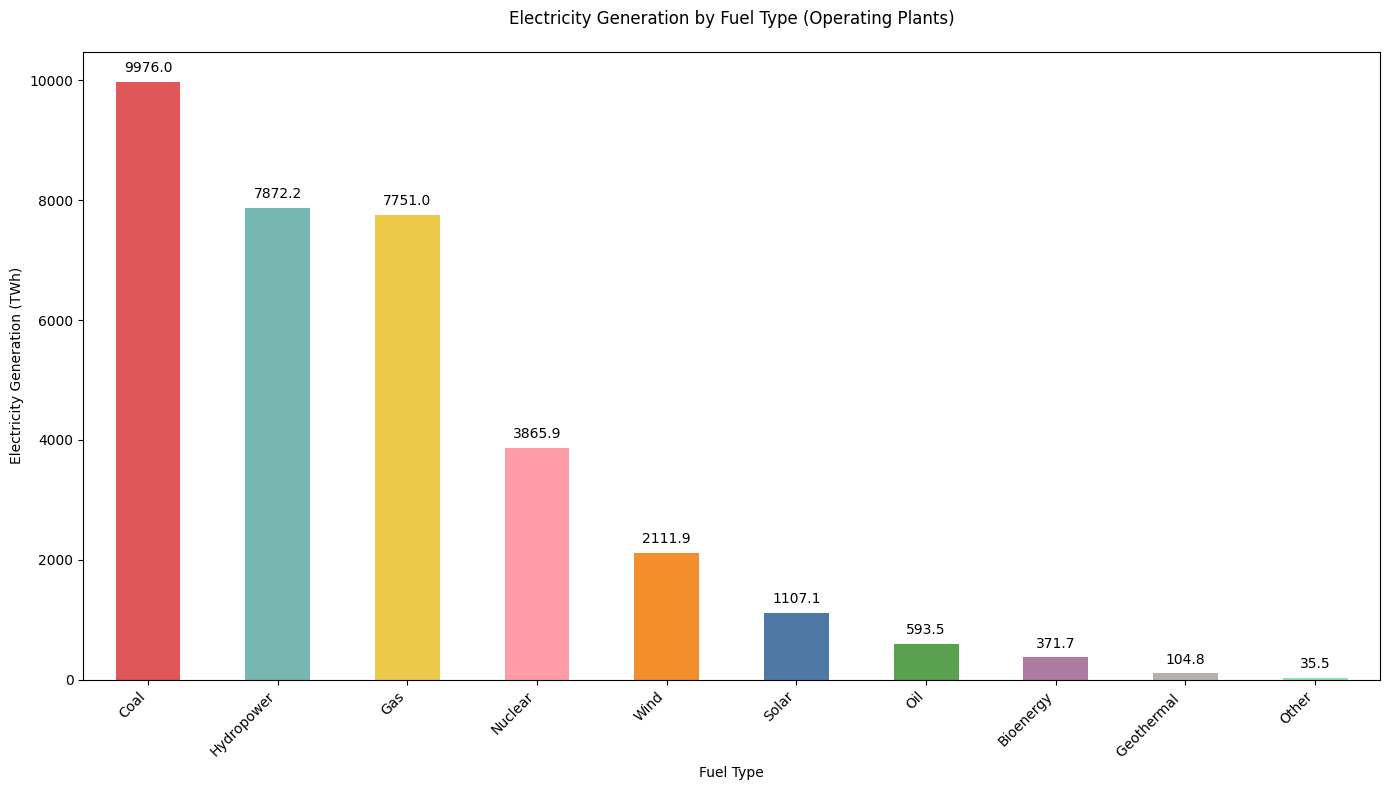

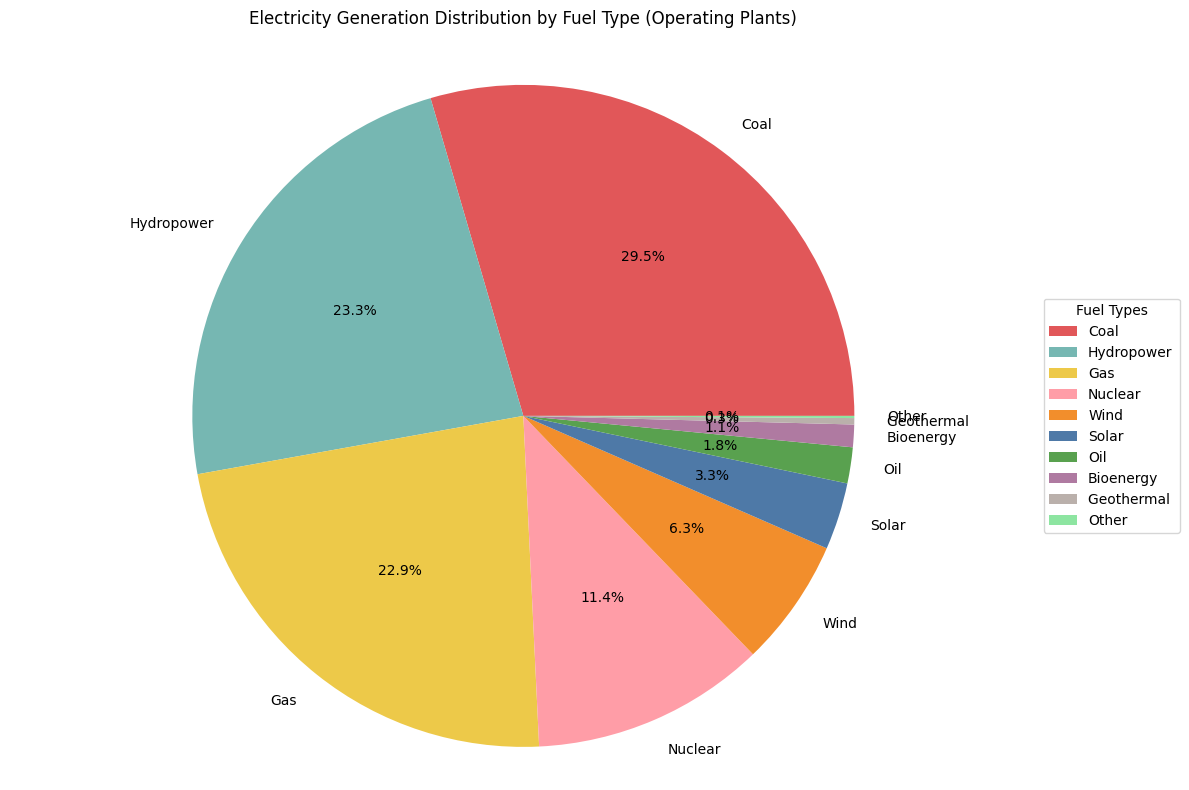

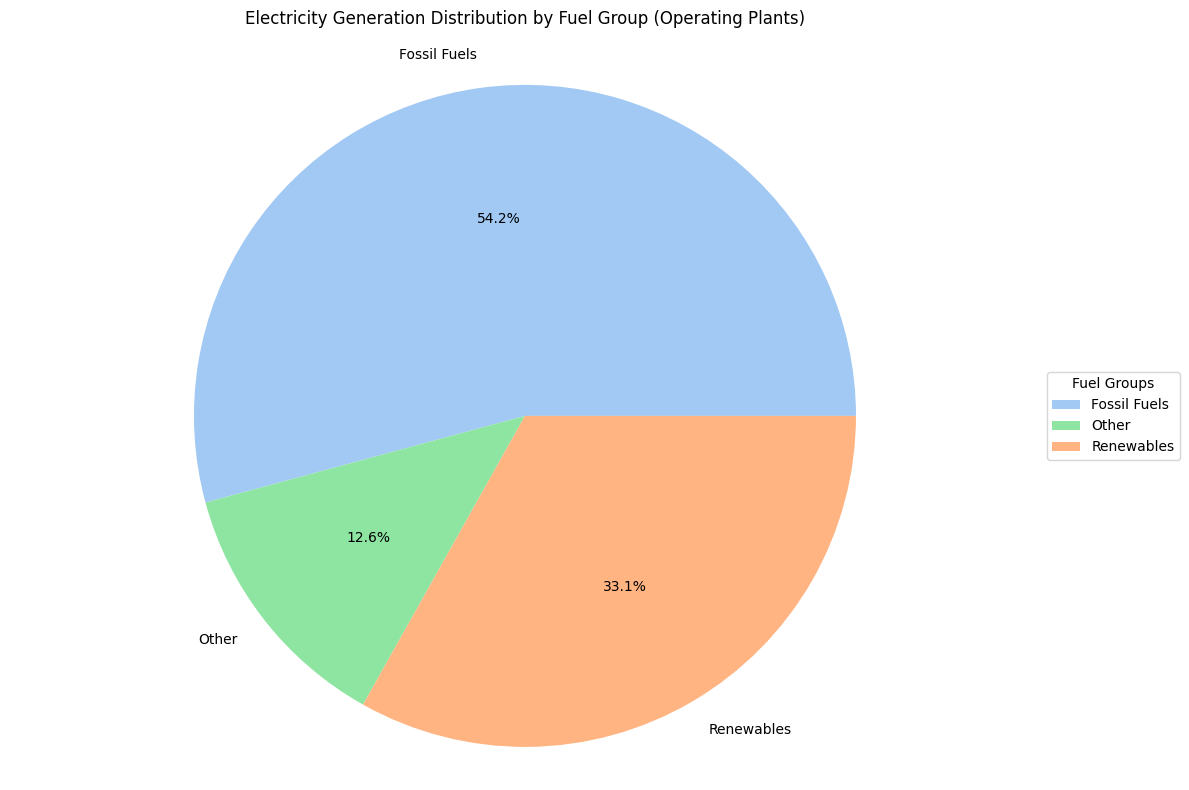


Electricity generation (activity) and % share of operating plants by fuel group:
              Activity (TWh)  Activity %
fuel_group                              
Fossil Fuels        18320.52        54.2
Other                4273.04        12.6
Renewables          11196.08        33.1




In [72]:
# Block 3a: Analysis of electricity generation (activity) by fuel type and fuel group

# Calculate total activity (electricity generation) in TWh
total_activity_twh = operating_df['activity'].sum() / 1e6  # Convert MWh to TWh

# Activity by fuel type (subsector) in TWh
activity_by_type_twh = operating_df.groupby('subsector')['activity'].sum().sort_values(ascending=False) / 1e6
activity_percent = (activity_by_type_twh / total_activity_twh * 100).round(1)

activity_df = pd.DataFrame({
    'Activity (TWh)': activity_by_type_twh.round(2),
    'Activity %': activity_percent
})
create_table(activity_df, "Electricity generation (activity) and % share of operating plants by fuel type:")

# Plotting activity by fuel type (bar plot)
plt.figure(figsize=(14, 8))
activity_by_type_twh.plot(kind='bar', color=[color_mapping[x] for x in activity_by_type_twh.index])
plt.title("Electricity Generation by Fuel Type (Operating Plants)", pad=20)
plt.xlabel('Fuel Type')
plt.ylabel('Electricity Generation (TWh)')
plt.xticks(rotation=45, ha='right')
add_value_labels(plt.gca())
plt.tight_layout()
plt.show()

# Pie chart for activity by fuel type
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(activity_by_type_twh, labels=activity_by_type_twh.index, autopct='%1.1f%%', colors=[color_mapping[x] for x in activity_by_type_twh.index])
plt.title("Electricity Generation Distribution by Fuel Type (Operating Plants)", pad=20)
plt.axis('equal')

# Add legend for fuel type pie chart
plt.legend(wedges, activity_by_type_twh.index, title="Fuel Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# Activity by fuel group in TWh
operating_df['fuel_group'] = operating_df['subsector'].map(lambda x: 'Fossil Fuels' if x in fossil_fuels else ('Renewables' if x in renewables else 'Other'))
activity_by_group_twh = operating_df.groupby('fuel_group')['activity'].sum() / 1e6

# Pie chart for activity by fuel group
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(activity_by_group_twh, labels=activity_by_group_twh.index, autopct='%1.1f%%', colors=[color_mapping[x] for x in activity_by_group_twh.index])
plt.title("Electricity Generation Distribution by Fuel Group (Operating Plants)", pad=20)
plt.axis('equal')

# Add legend for fuel group pie chart
plt.legend(wedges, activity_by_group_twh.index, title="Fuel Groups", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# Create table for activity by fuel group
activity_group_df = pd.DataFrame({
    'Activity (TWh)': activity_by_group_twh.round(2),
    'Activity %': (activity_by_group_twh / total_activity_twh * 100).round(1)
})
create_table(activity_group_df, "Electricity generation (activity) and % share of operating plants by fuel group:")

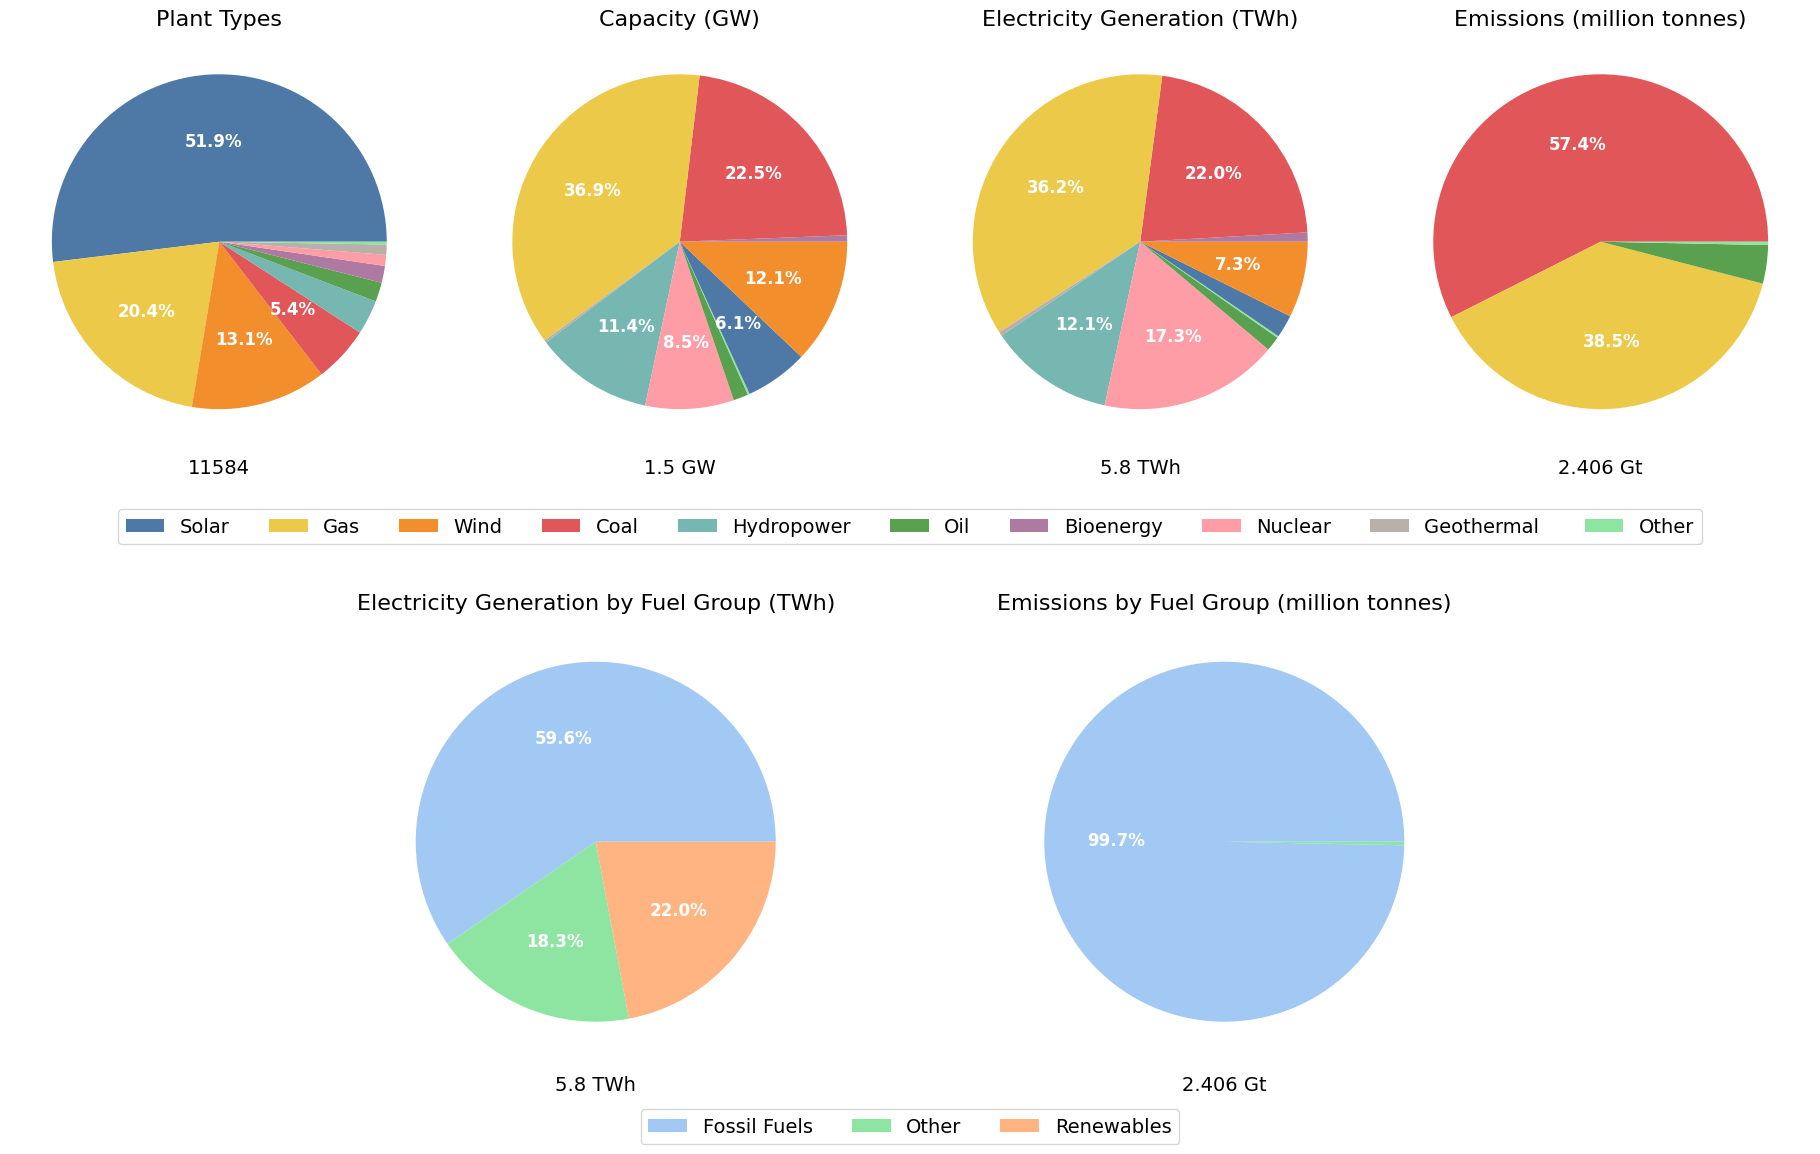

In [74]:
def format_value(value, metric):
    if metric == 'capacity':
        # Convert MW to GW
        gw_value = value / 1000
        return f'{gw_value:.1f} GW'
    elif metric == 'activity':
        # Convert MWh to TWh
        twh_value = value / 1_000_000
        return f'{twh_value:.1f} TWh'
    elif metric == 'emissions':
        # Convert Mt to Gt
        gt_value = value / 1000
        return f'{gt_value:.3f} Gt'
    else:
        return f'{value:.0f}'

def create_pie_chart_with_legend(data, ax, title=None, show_legend=False):
    # Custom autopct function to hide small percentages
    def make_autopct(values):
        def my_autopct(pct):
            if pct < 4:
                return ''
            return f'{pct:.1f}%'
        return my_autopct

    # Create pie chart
    wedges, texts, autotexts = ax.pie(data, 
                                     autopct=make_autopct(data), 
                                     colors=[color_mapping[x] for x in data.index])
    
    # Format values in pie chart
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(12)

    if title:
        ax.set_title(title, pad=5, fontsize=16)

    if show_legend:
        ax.legend(wedges, data.index, 
                 title="Categories", 
                 loc="center left", 
                 bbox_to_anchor=(1, 0, 0.5, 1))

    return wedges, data.index

# Create figure with custom GridSpec
fig = plt.figure(figsize=(20, 15))

# First row for 4 pie charts
gs1 = GridSpec(1, 4, left=0.05, right=0.95, top=0.85, bottom=0.45, wspace=0.1)

# Create first row of pie charts
ax1 = plt.subplot(gs1[0, 0])
wedges1, labels1 = create_pie_chart_with_legend(region_types, ax1, title="Plant Types")
ax1.text(0, -1.35, format_value(region_types.sum(), 'count'),
        ha='center', va='center', fontsize=14)

ax2 = plt.subplot(gs1[0, 1])
wedges2, _ = create_pie_chart_with_legend(region_capacity, ax2, title="Capacity (GW)")
ax2.text(0, -1.35, format_value(region_capacity.sum(), 'capacity'),
        ha='center', va='center', fontsize=14)

ax3 = plt.subplot(gs1[0, 2])
wedges3, _ = create_pie_chart_with_legend(region_activity, ax3, title="Electricity Generation (TWh)")
ax3.text(0, -1.35, format_value(region_activity.sum(), 'activity'),
        ha='center', va='center', fontsize=14)

ax4 = plt.subplot(gs1[0, 3])
wedges4, _ = create_pie_chart_with_legend(region_emissions, ax4, title="Emissions (million tonnes)")
ax4.text(0, -1.35, format_value(region_emissions.sum(), 'emissions'),
        ha='center', va='center', fontsize=14)

# Add common legend for first row
fig.legend(wedges1, labels1,
          loc='center',
          bbox_to_anchor=(0.5, 0.46),
          ncol=10,
          fontsize=14)

# Second row for 2 fuel group charts
gs2 = GridSpec(1, 2, left=0.2, right=0.8, top=0.4, bottom=0.1, wspace=0.1)

# Create fuel group charts
ax5 = plt.subplot(gs2[0, 0])
wedges5, labels5 = create_pie_chart_with_legend(fuel_group_activity, ax5, 
                                              title="Electricity Generation by Fuel Group (TWh)")
ax5.text(0, -1.35, format_value(fuel_group_activity.sum(), 'activity'),
        ha='center', va='center', fontsize=14)

ax6 = plt.subplot(gs2[0, 1])
wedges6, _ = create_pie_chart_with_legend(fuel_group_emissions, ax6, 
                                        title="Emissions by Fuel Group (million tonnes)")
ax6.text(0, -1.35, format_value(fuel_group_emissions.sum(), 'emissions'),
        ha='center', va='center', fontsize=14)

# Add common legend for second row
fig.legend(wedges5, labels5,
          loc='center',
          bbox_to_anchor=(0.5, 0.06),
          ncol=3,
          fontsize=14)

plt.show()


Analyzing Region: Africa
Total operating plants in Africa: 1364

Plant types in Africa:
             Count  Percentage  Capacity (GW)  Capacity %  Electricity (TWh)  Electricity %  Emissions (million tonnes)  Emissions %
Bioenergy       18         1.3           0.79         0.3               1.38            0.1                        0.00          0.0
Coal           154        11.3          52.00        20.5             268.35           26.0                      283.62         53.2
Gas            419        30.7         113.24        44.6             473.88           46.0                      208.51         39.1
Geothermal      15         1.1           0.81         0.3               5.80            0.6                        0.00          0.0
Hydropower      96         7.0          40.98        16.2             170.38           16.5                        0.00          0.0
Nuclear          2         0.1           1.94         0.8              13.60            1.3                      

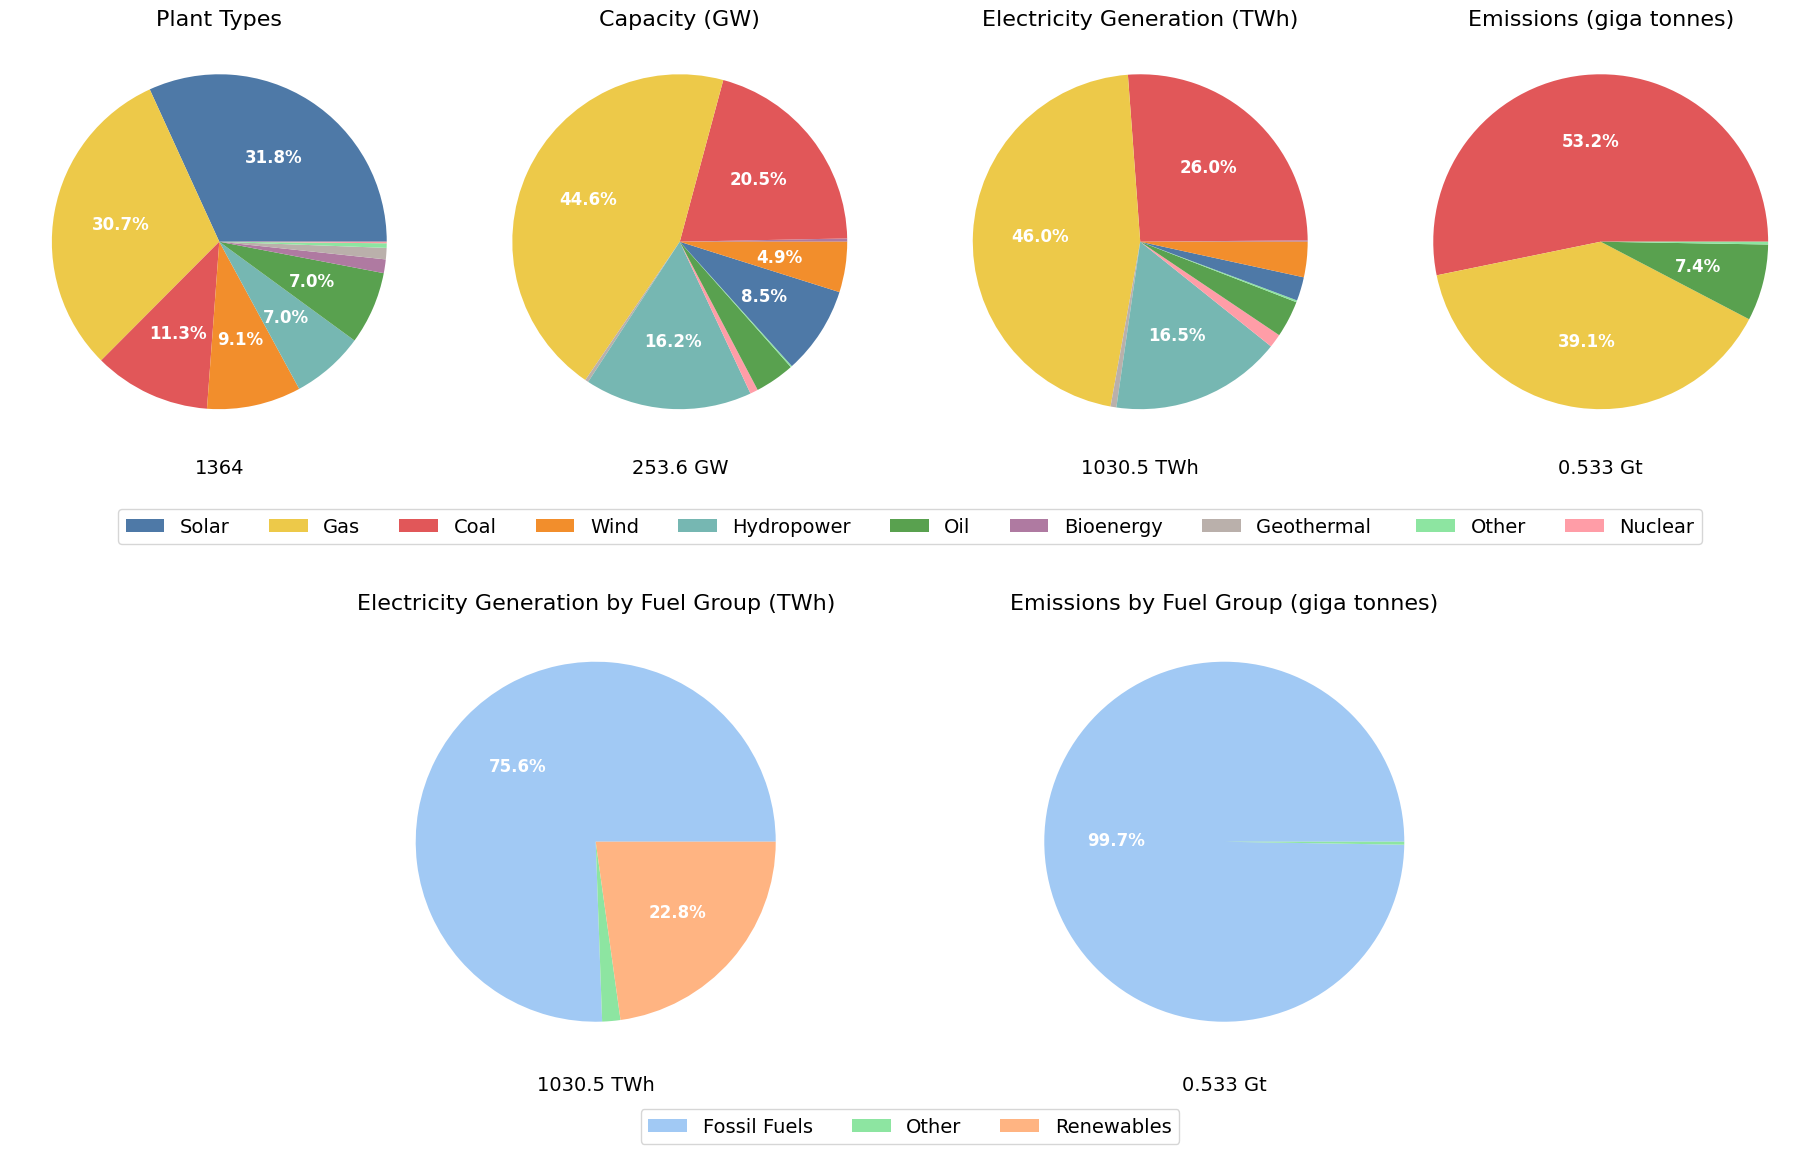


Analyzing Region: Asia
Total operating plants in Asia: 33442

Plant types in Asia:
             Count  Percentage  Capacity (GW)  Capacity %  Electricity (TWh)  Electricity %  Emissions (million tonnes)  Emissions %
Bioenergy      945         2.8          42.02         0.8             164.68            0.8                        0.00          0.0
Coal          5077        15.2        1678.82        30.7            7566.18           38.2                     7424.00         79.9
Gas           2836         8.5         796.52        14.6            3426.13           17.3                     1507.50         16.2
Geothermal     156         0.5           7.19         0.1              47.30            0.2                        0.00          0.0
Hydropower    1486         4.4        1452.42        26.5            4940.23           24.9                        0.00          0.0
Nuclear        259         0.8         251.18         4.6            1704.16            8.6                        0.0

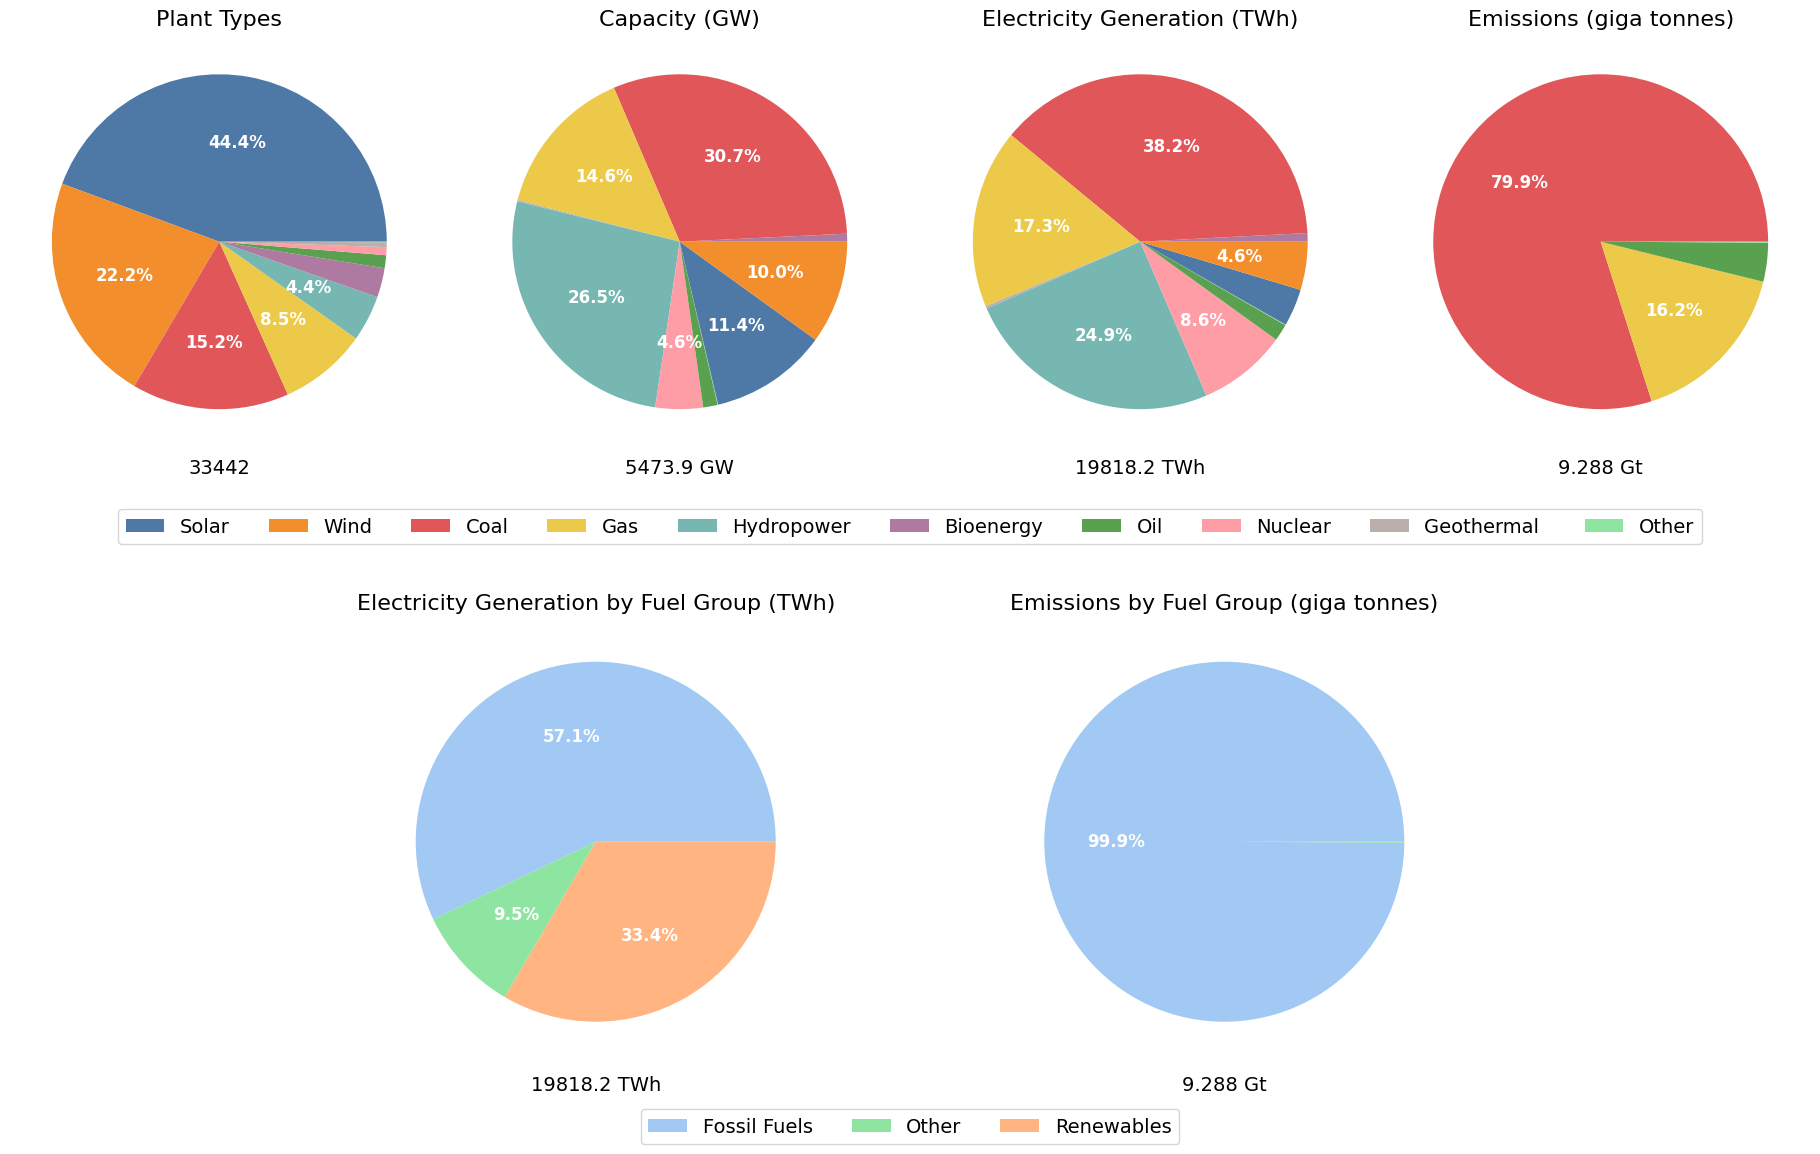


Analyzing Region: Australia and New Zealand
Total operating plants in Australia and New Zealand: 563

Plant types in Australia and New Zealand:
             Count  Percentage  Capacity (GW)  Capacity %  Electricity (TWh)  Electricity %  Emissions (million tonnes)  Emissions %
Bioenergy        7         1.2           0.30         0.4               1.16            0.4                        0.00          0.0
Coal            56         9.9          23.36        28.7             108.25           37.3                      123.04         75.5
Gas            102        18.1          14.05        17.3              64.40           22.2                       28.33         17.4
Geothermal      22         3.9           1.27         1.6               9.46            3.3                        0.00          0.0
Hydropower      45         8.0          12.00        14.8              38.77           13.4                        0.00          0.0
Oil              5         0.9           0.67         0.8

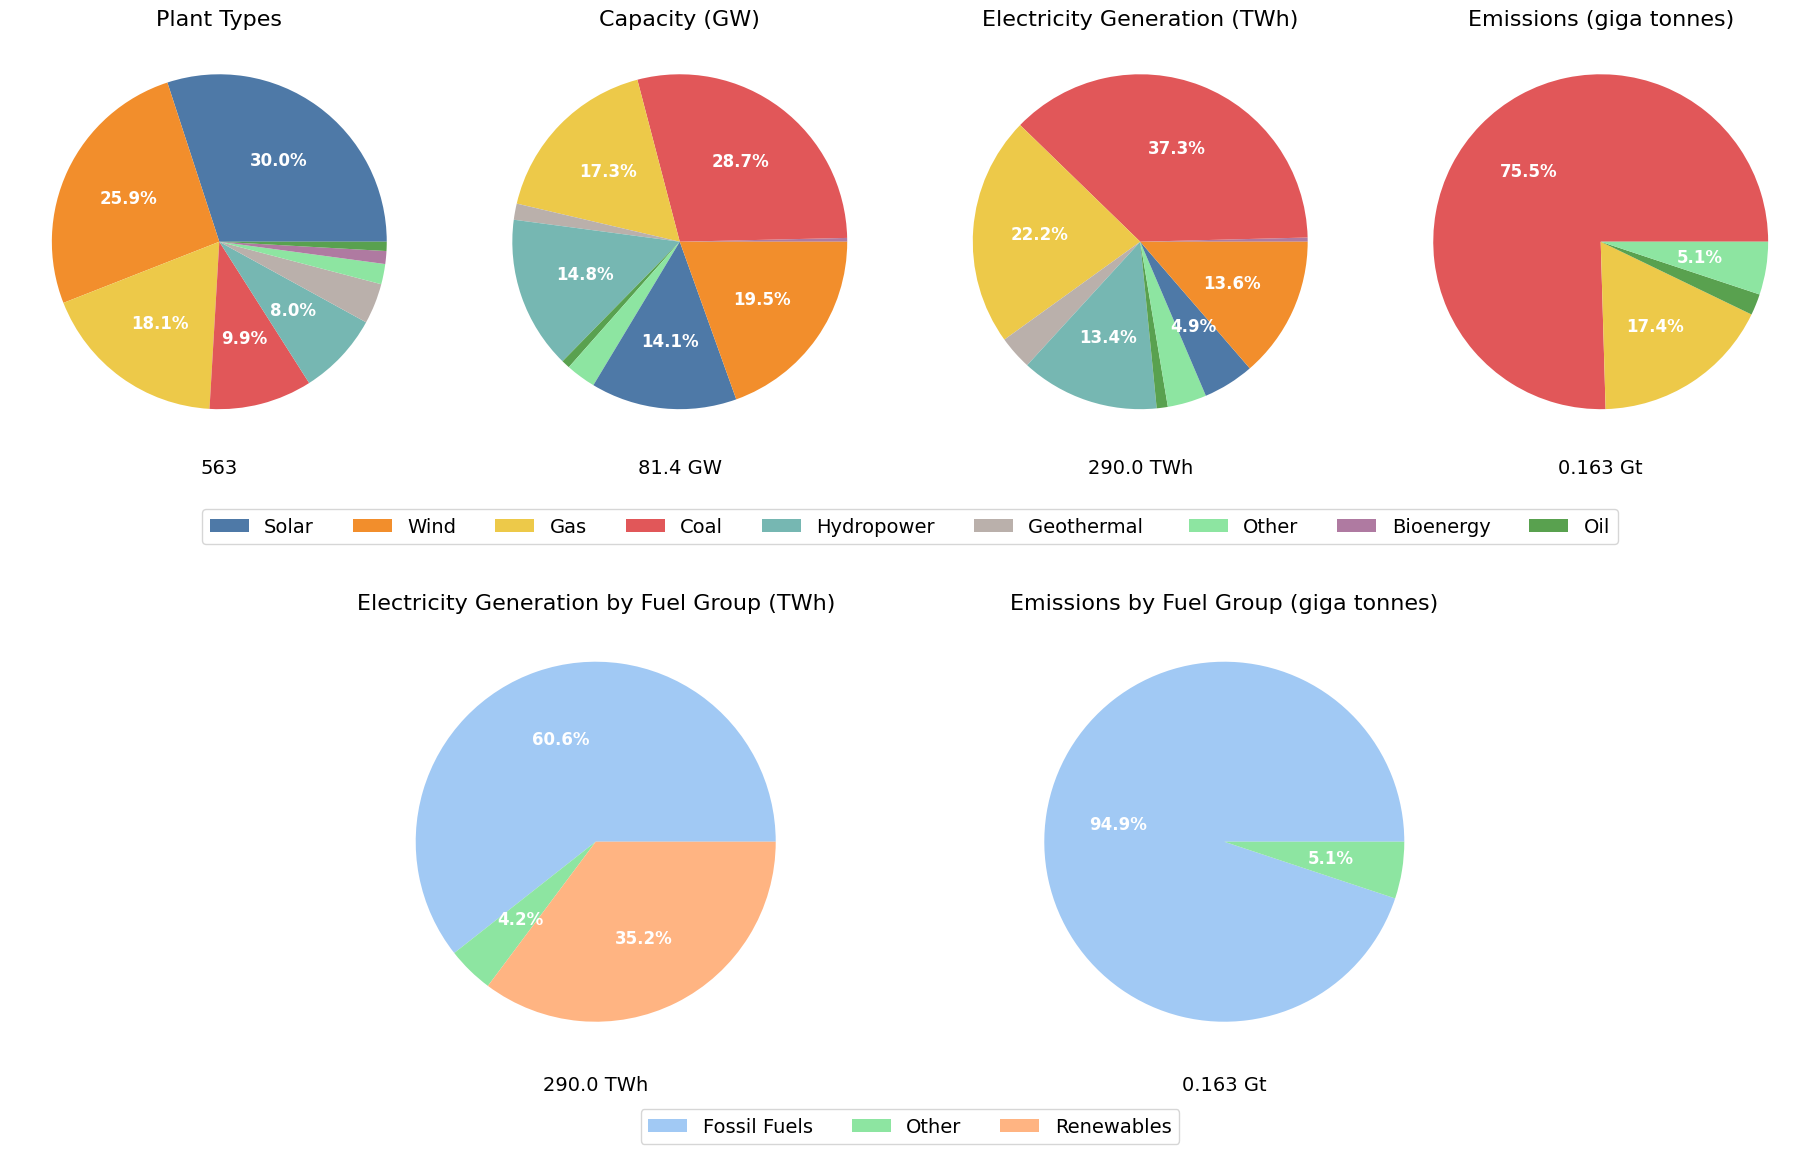


Analyzing Region: Europe
Total operating plants in Europe: 28608

Plant types in Europe:
             Count  Percentage  Capacity (GW)  Capacity %  Electricity (TWh)  Electricity %  Emissions (million tonnes)  Emissions %
Bioenergy      218         0.8          16.79         1.2              88.29            1.8                        0.00          0.0
Coal           818         2.9         168.02        11.9             680.33           13.7                      791.43         56.5
Gas           1844         6.4         338.03        23.9            1253.82           25.2                      551.68         39.4
Geothermal      32         0.1           1.24         0.1               9.05            0.2                        0.00          0.0
Hydropower    1036         3.6         293.41        20.7            1029.38           20.7                        0.00          0.0
Nuclear        174         0.6         163.46        11.6            1110.89           22.4                     

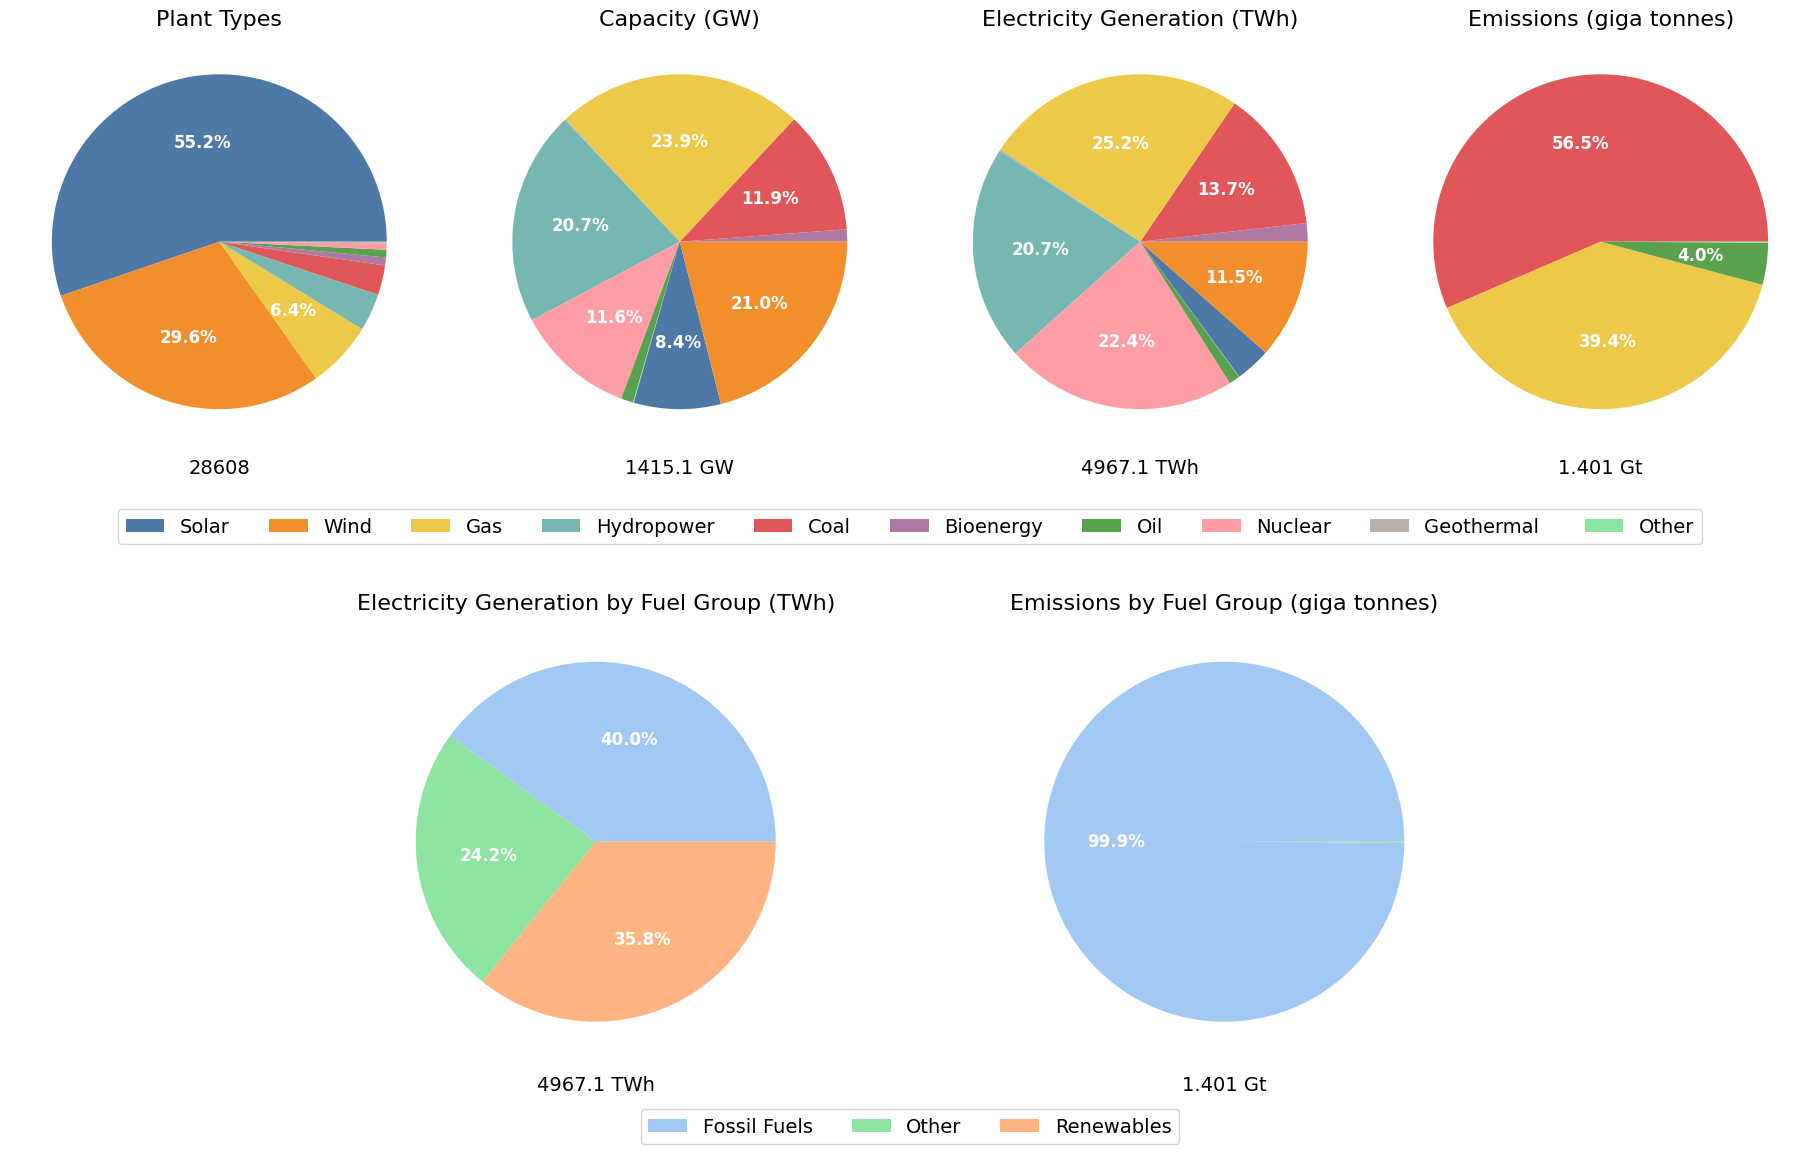


Analyzing Region: Latin America and the Caribbean
Total operating plants in Latin America and the Caribbean: 4156

Plant types in Latin America and the Caribbean:
             Count  Percentage  Capacity (GW)  Capacity %  Electricity (TWh)  Electricity %  Emissions (million tonnes)  Emissions %
Bioenergy      301         7.2          16.83         3.3              64.39            3.5                        0.00          0.0
Coal            85         2.0          17.84         3.5              67.11            3.6                       74.67         20.5
Gas            468        11.3         110.49        21.9             425.79           23.0                      187.35         51.4
Geothermal      44         1.1           1.65         0.3              10.10            0.5                        0.00          0.0
Hydropower     368         8.9         221.43        43.9             987.77           53.3                        0.00          0.0
Nuclear          6         0.1        

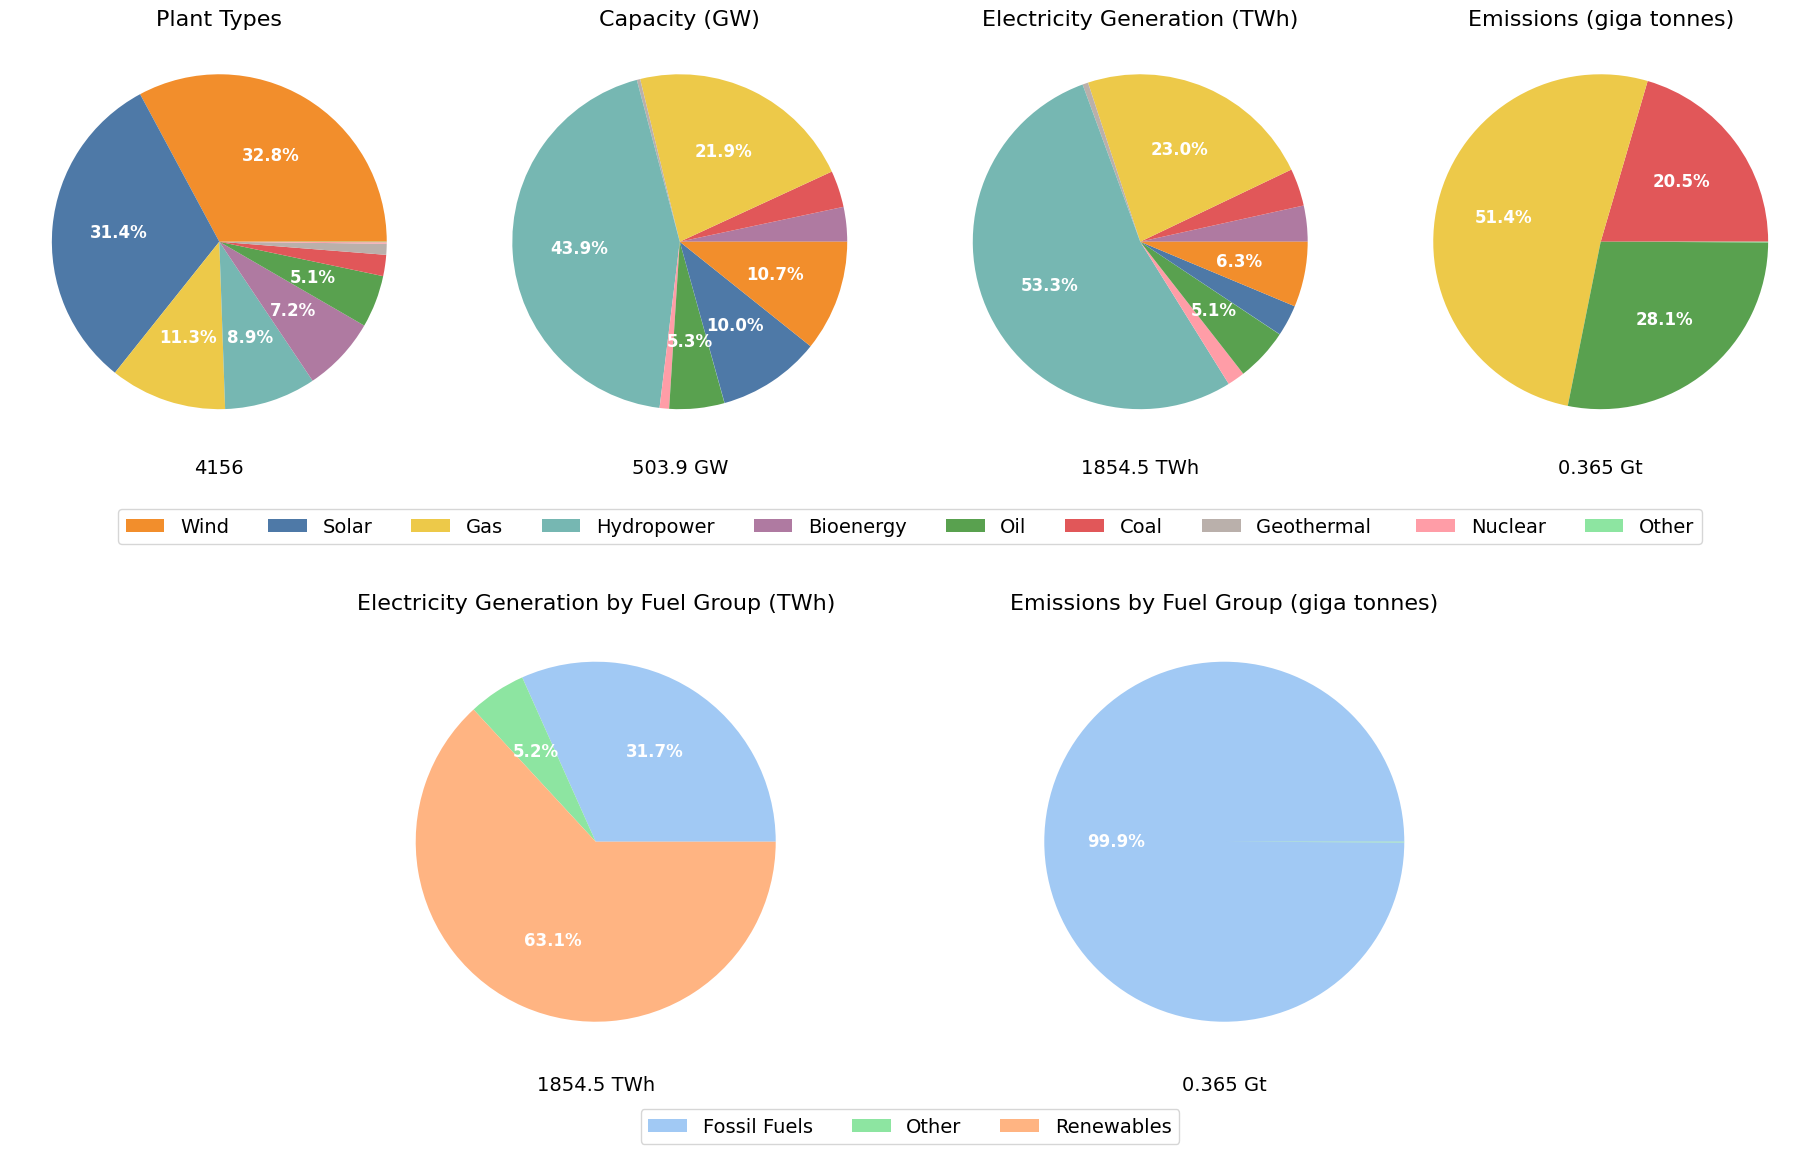


Analyzing Region: Northern America
Total operating plants in Northern America: 11584

Plant types in Northern America:
             Count  Percentage  Capacity (GW)  Capacity %  Electricity (TWh)  Electricity %  Emissions (million tonnes)  Emissions %
Bioenergy      189         1.6           9.34         0.6              51.80            0.9                        0.00          0.0
Coal           628         5.4         339.93        22.5            1281.26           22.0                     1382.10         57.4
Gas           2368        20.4         558.20        36.9            2106.75           36.2                      926.97         38.5
Geothermal     114         1.0           3.63         0.2              22.90            0.4                        0.00          0.0
Hydropower     385         3.3         172.45        11.4             705.03           12.1                        0.00          0.0
Nuclear        123         1.1         129.21         8.5            1005.88      

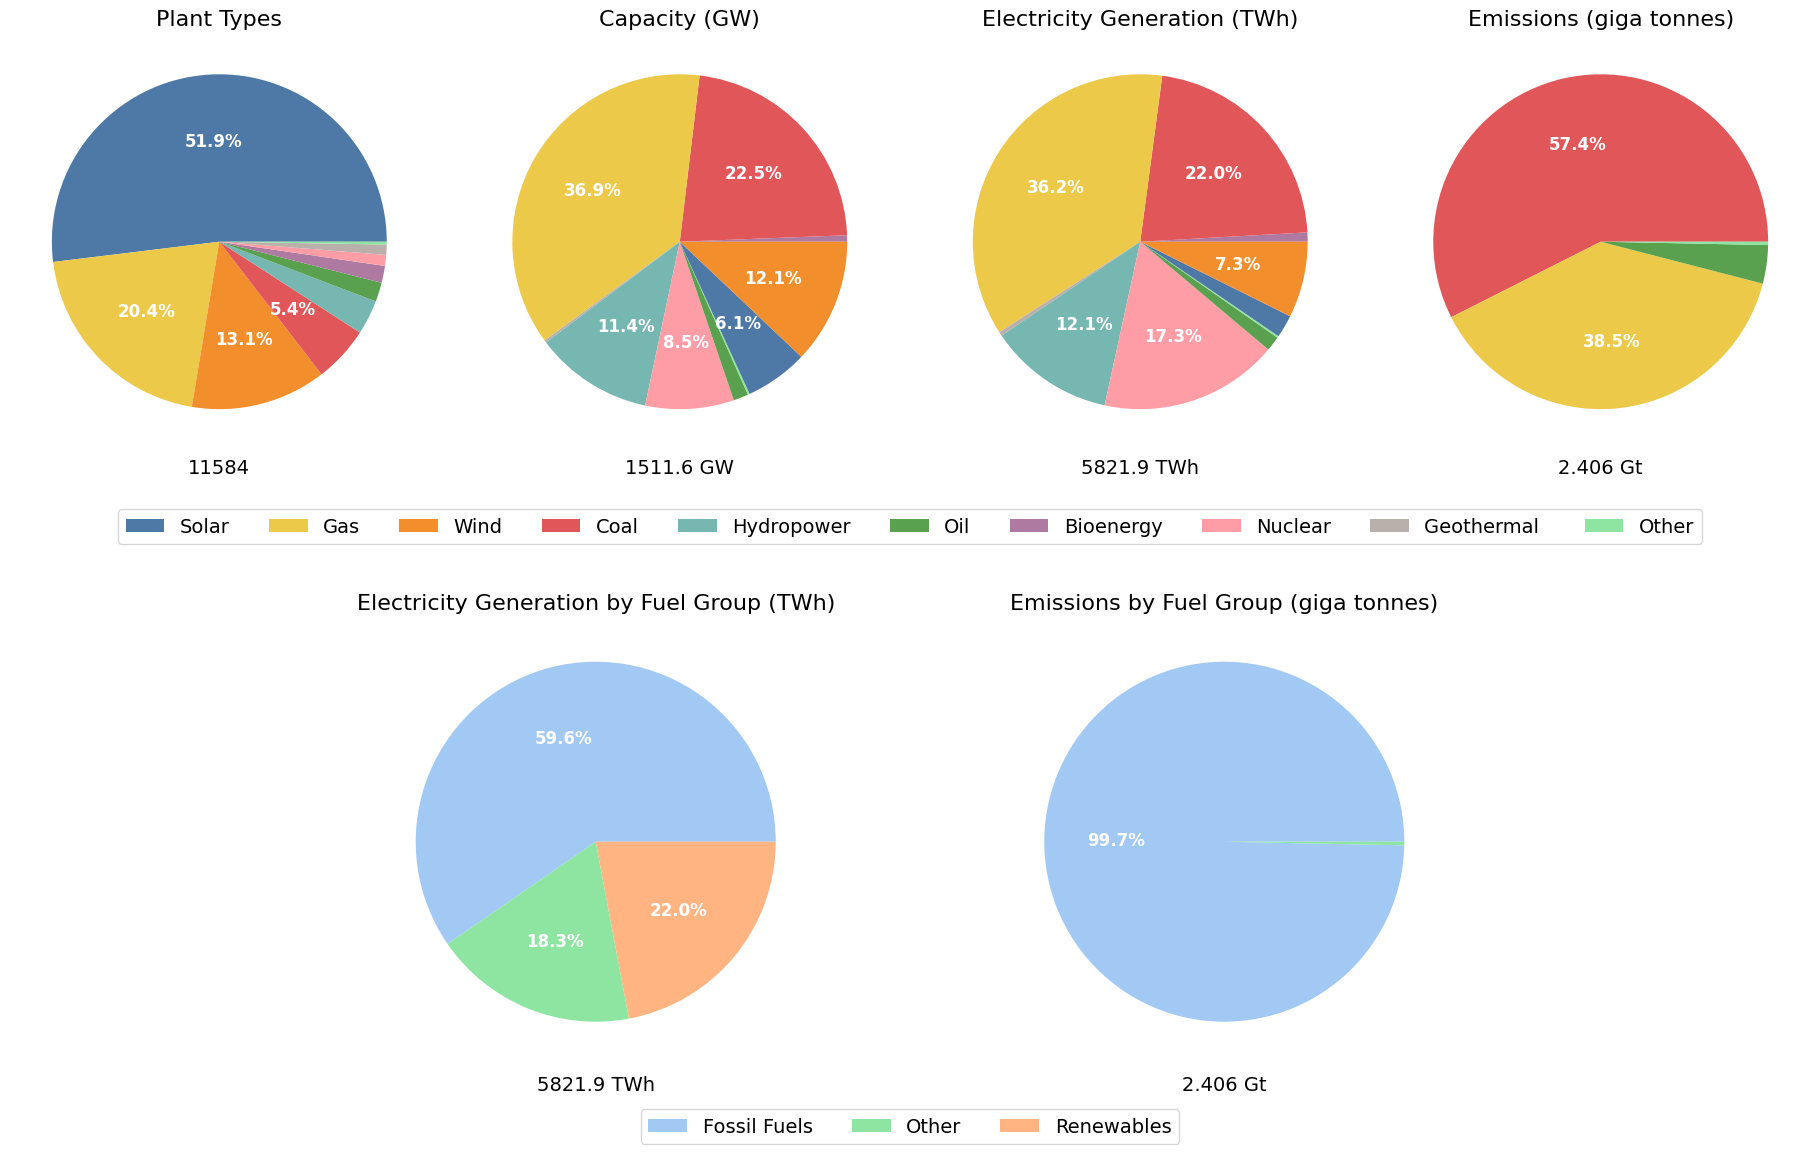

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def format_value(value, metric):
    if metric == 'capacity':
        return f'{value:.1f} GW'
    elif metric == 'activity':
        # Value is already in TWh at this point, no need for further conversion
        return f'{value:.1f} TWh'
    elif metric == 'emissions':
        gt_value = value / 1000
        return f'{gt_value:.3f} Gt'
    else:
        return f'{value:.0f}'

def create_pie_chart_with_legend(data, ax, title=None, show_legend=False):
    def make_autopct(values):
        def my_autopct(pct):
            if pct < 4:
                return ''
            return f'{pct:.1f}%'
        return my_autopct

    wedges, texts, autotexts = ax.pie(data, 
                                     autopct=make_autopct(data), 
                                     colors=[color_mapping[x] for x in data.index])
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(12)

    if title:
        ax.set_title(title, pad=5, fontsize=16)

    if show_legend:
        ax.legend(wedges, data.index, 
                 title="Categories", 
                 loc="center left", 
                 bbox_to_anchor=(1, 0, 0.5, 1))

    return wedges, data.index

operating_by_region = operating_df.groupby('gca_region')

for region, region_df in operating_by_region:
    print(f"\nAnalyzing Region: {region}")
    total_region = len(region_df)
    print(f"Total operating plants in {region}: {total_region}")
    
    # Calculate statistics
    region_types = region_df['subsector'].value_counts()
    region_types_percent = (region_types / total_region * 100).round(1)
    
    region_capacity = region_df.groupby('subsector')['capacity'].sum() / 1000
    region_capacity_percent = (region_capacity / region_capacity.sum() * 100).round(1)
    
    region_activity = region_df.groupby('subsector')['activity'].sum() / 1_000_000  # Convert MWh to TWh
    region_activity_percent = (region_activity / region_activity.sum() * 100).round(1)
    
    region_emissions = region_df.groupby('subsector')['annualco2tyear'].sum()
    region_emissions_percent = (region_emissions / region_emissions.sum() * 100).round(1)
    
    # Create summary DataFrame
    region_summary_df = pd.DataFrame({
        'Count': region_types,
        'Percentage': region_types_percent,
        'Capacity (GW)': region_capacity.round(2),
        'Capacity %': region_capacity_percent,
        'Electricity (TWh)': region_activity.round(2),
        'Electricity %': region_activity_percent,
        'Emissions (million tonnes)': region_emissions.round(2),
        'Emissions %': region_emissions_percent
    })
    
    # Add total row
    total_row = pd.DataFrame({
        'Count': [region_types.sum()],
        'Percentage': [100.0],
        'Capacity (GW)': [region_capacity.sum().round(2)],
        'Capacity %': [100.0],
        'Electricity (TWh)': [region_activity.sum().round(2)],
        'Electricity %': [100.0],
        'Emissions (million tonnes)': [region_emissions.sum().round(2)],
        'Emissions %': [100.0]
    }, index=['Total'])
    
    region_summary_df = pd.concat([region_summary_df, total_row])
    
    # Display summary table
    create_table(region_summary_df, f"Plant types in {region}:")
    
    # Create figure with custom GridSpec
    fig = plt.figure(figsize=(20, 15))
    
    # First row for 4 pie charts
    gs1 = GridSpec(1, 4, left=0.05, right=0.95, top=0.85, bottom=0.45, wspace=0.1)
    
    # Create first row of pie charts
    ax1 = plt.subplot(gs1[0, 0])
    wedges1, labels1 = create_pie_chart_with_legend(region_types, ax1, title="Plant Types")
    ax1.text(0, -1.35, format_value(region_types.sum(), 'count'),
            ha='center', va='center', fontsize=14)
    
    ax2 = plt.subplot(gs1[0, 1])
    wedges2, _ = create_pie_chart_with_legend(region_capacity, ax2, title="Capacity (GW)")
    ax2.text(0, -1.35, format_value(region_capacity.sum(), 'capacity'),
            ha='center', va='center', fontsize=14)
    
    ax3 = plt.subplot(gs1[0, 2])
    wedges3, _ = create_pie_chart_with_legend(region_activity, ax3, title="Electricity Generation (TWh)")
    ax3.text(0, -1.35, format_value(region_activity.sum(), 'activity'),
            ha='center', va='center', fontsize=14)
    
    ax4 = plt.subplot(gs1[0, 3])
    wedges4, _ = create_pie_chart_with_legend(region_emissions, ax4, title="Emissions (giga tonnes)")
    ax4.text(0, -1.35, format_value(region_emissions.sum(), 'emissions'),
            ha='center', va='center', fontsize=14)
    
    # Add common legend for first row
    fig.legend(wedges1, labels1,
              loc='center',
              bbox_to_anchor=(0.5, 0.46),
              ncol=10,
              fontsize=14)
    
    # Calculate fuel group statistics
    region_df['fuel_group'] = region_df['subsector'].map(
        lambda x: 'Fossil Fuels' if x in fossil_fuels else ('Renewables' if x in renewables else 'Other'))
    fuel_group_activity = region_df.groupby('fuel_group')['activity'].sum() / 1_000_000  # Convert MWh to TWh
    fuel_group_emissions = region_df.groupby('fuel_group')['annualco2tyear'].sum()
    
    # Second row for 2 fuel group charts
    gs2 = GridSpec(1, 2, left=0.2, right=0.8, top=0.4, bottom=0.1, wspace=0.1)
    
    # Create fuel group charts
    ax5 = plt.subplot(gs2[0, 0])
    wedges5, labels5 = create_pie_chart_with_legend(fuel_group_activity, ax5, 
                                                  title="Electricity Generation by Fuel Group (TWh)")
    ax5.text(0, -1.35, format_value(fuel_group_activity.sum(), 'activity'),
            ha='center', va='center', fontsize=14)
    
    ax6 = plt.subplot(gs2[0, 1])
    wedges6, _ = create_pie_chart_with_legend(fuel_group_emissions, ax6, 
                                            title="Emissions by Fuel Group (giga tonnes)")
    ax6.text(0, -1.35, format_value(fuel_group_emissions.sum(), 'emissions'),
            ha='center', va='center', fontsize=14)
    
    # Add common legend for second row
    fig.legend(wedges5, labels5,
              loc='center',
              bbox_to_anchor=(0.5, 0.06),
              ncol=3,
              fontsize=14)
    
    plt.show()

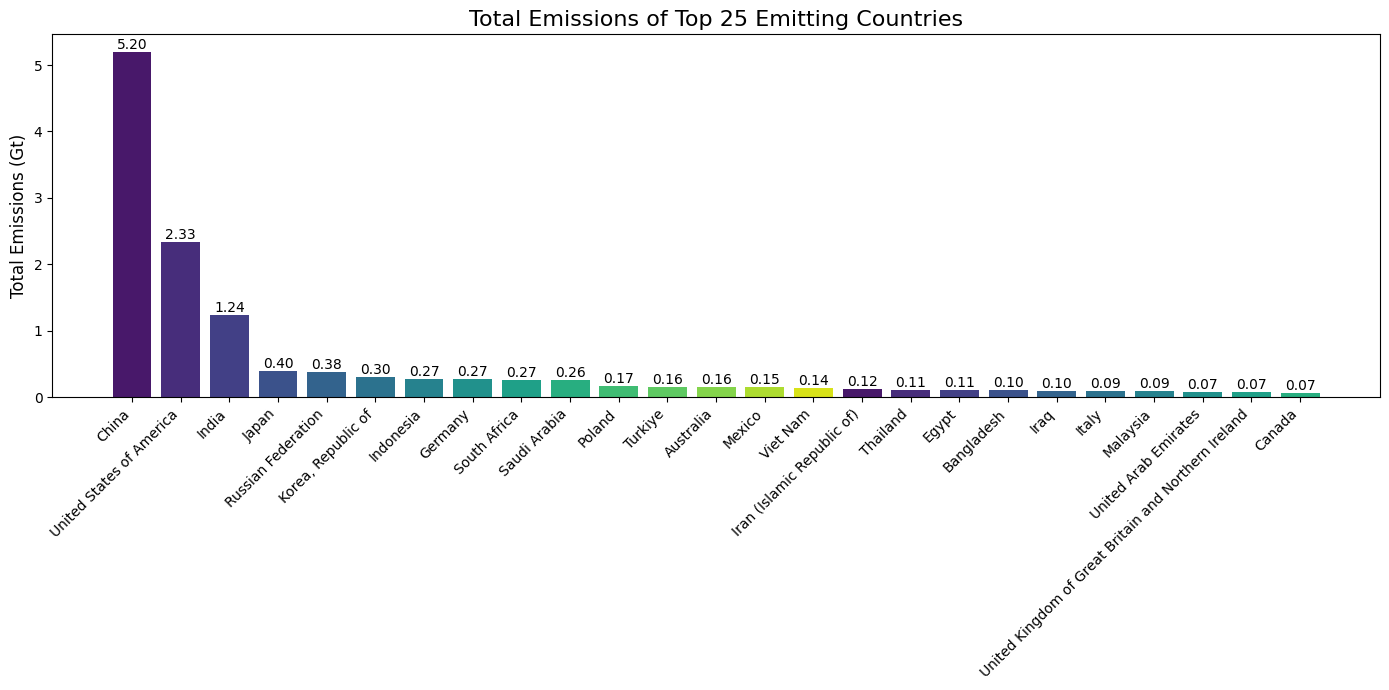

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the aggregated data file
final_df = pd.read_csv('/Users/yukthabhadane/Documents/Climate Finance Thesis/Data/v5_aggregated_data.csv')

# Create merged_df by sorting and getting top 15 emitting countries
merged_df = final_df[final_df['country_name'] != 'World'].sort_values('tot_emissions [Gt]', ascending=False).head(25)

# Create the visualization
plt.figure(figsize=(14, 7))
bars = plt.bar(merged_df['country_name'], merged_df['tot_emissions [Gt]'], 
               color=sns.color_palette("viridis", 15))

plt.title('Total Emissions of Top 25 Emitting Countries', fontsize=16)
plt.ylabel('Total Emissions (Gt)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

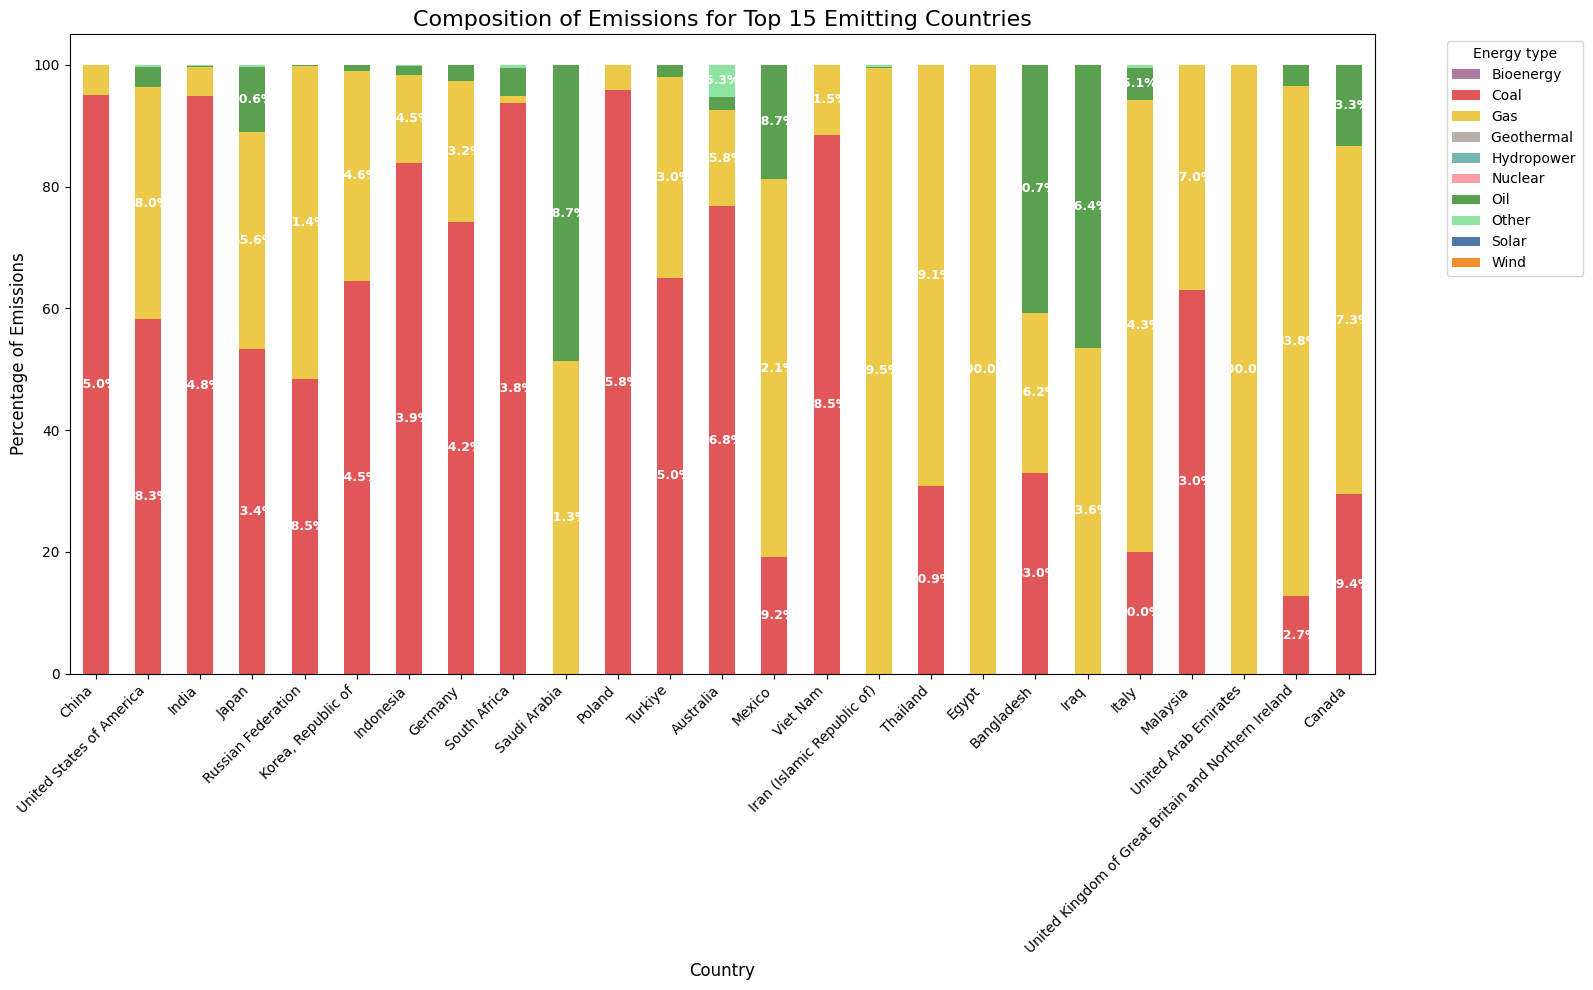

In [77]:
# Define fuel types
fuel_types = ['Bioenergy', 'Coal', 'Gas', 'Geothermal ', 'Hydropower', 'Nuclear', 'Oil', 'Other', 'Solar', 'Wind']

# Prepare data
fuel_data = merged_df[[f'annualco2tyear_{fuel} [Mt]' for fuel in fuel_types]]
fuel_data_percentage = fuel_data.div(fuel_data.sum(axis=1), axis=0) * 100

# Create the plot
plt.figure(figsize=(16, 10))
ax = fuel_data_percentage.plot(kind='bar', stacked=True, ax=plt.gca(), 
                              color=[color_mapping[fuel] for fuel in fuel_types])

plt.title('Composition of Emissions for Top 15 Emitting Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Emissions', fontsize=12)

# Simplify legend labels
handles, labels = ax.get_legend_handles_labels()
simplified_labels = [label.replace('annualco2tyear_', '').replace(' [Mt]', '') for label in labels]
plt.legend(handles, simplified_labels, title='Energy type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(range(len(merged_df)), merged_df['country_name'], rotation=45, ha='right')

# Add percentage labels for segments > 5%
for c in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=9, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

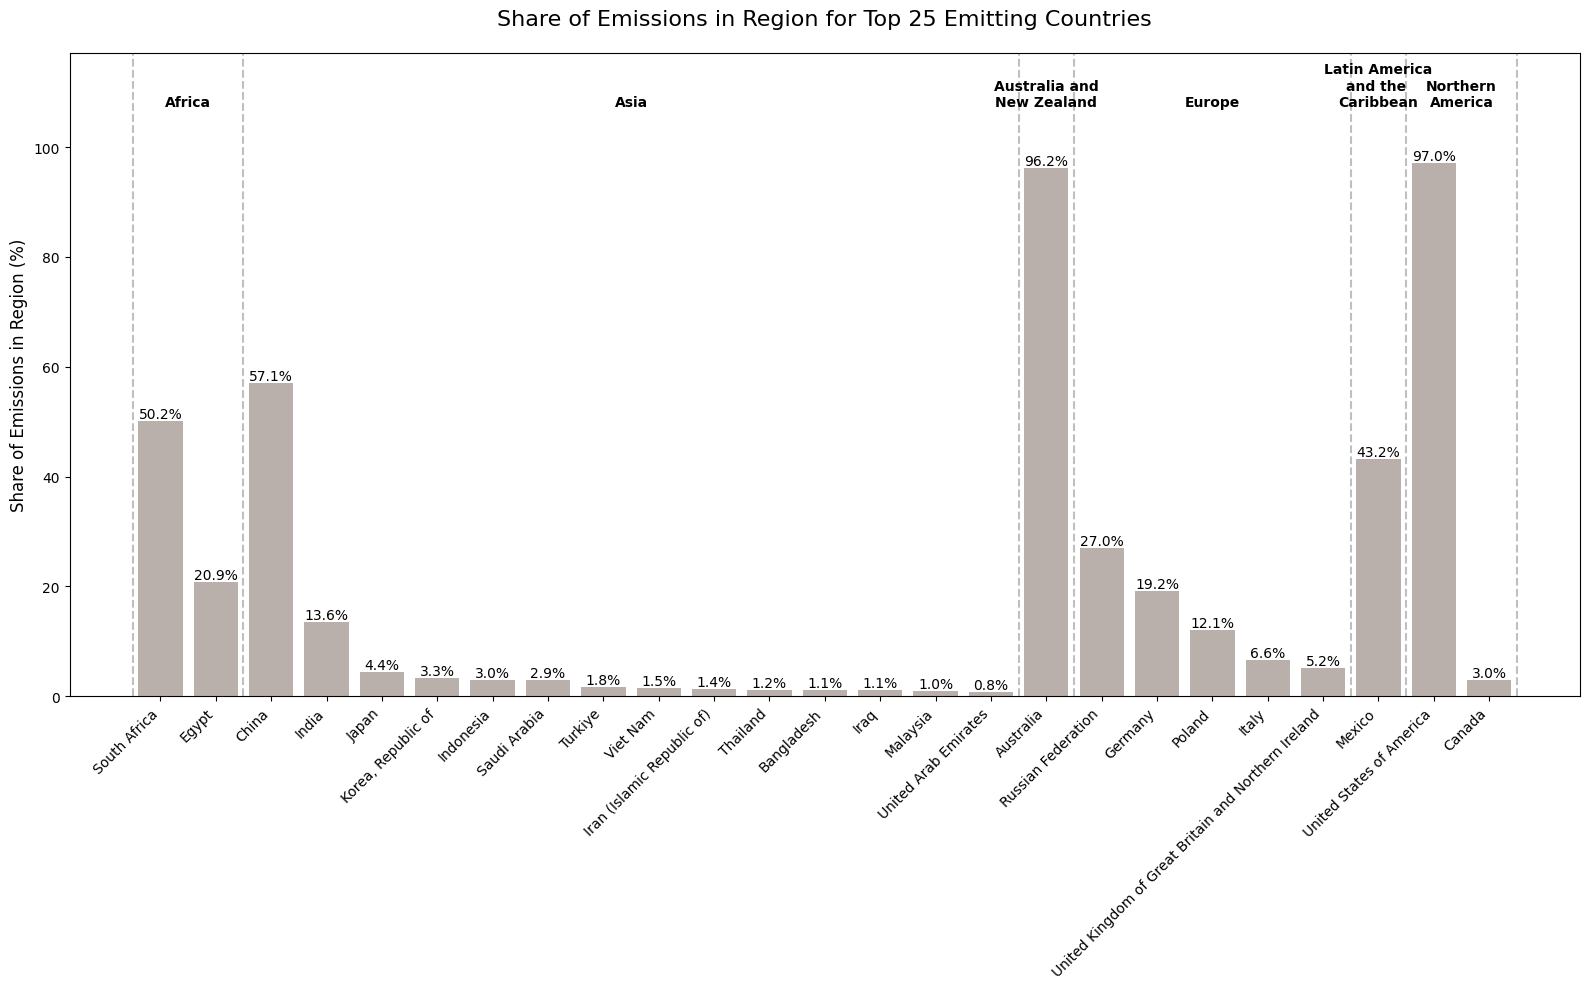

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the aggregated data file
final_df = pd.read_csv('/Users/yukthabhadane/Documents/Climate Finance Thesis/Data/v5_aggregated_data.csv')

# Create merged_df by getting top 15 emitting countries
merged_df = final_df[final_df['country_name'] != 'World'].sort_values('tot_emissions [Gt]', ascending=False).head(25)

# Sort the dataframe by region and emissions share within each region
sorted_df = merged_df.sort_values(['gca_region', 'emissions_share_in_region [%]'], ascending=[True, False])

plt.figure(figsize=(16, 10))
bars = plt.bar(range(len(sorted_df)), sorted_df['emissions_share_in_region [%]'], 
               color='#bab0ab')  # Using grey for all bars

plt.title('Share of Emissions in Region for Top 25 Emitting Countries', fontsize=16, pad=20)
plt.ylabel('Share of Emissions in Region (%)', fontsize=12)
plt.xticks(range(len(sorted_df)), sorted_df['country_name'], rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Add region labels with extra spacing and line breaks for long names
prev_region = ''
for i, region in enumerate(sorted_df['gca_region']):
    if region != prev_region:
        plt.axvline(x=i-0.5, color='gray', linestyle='--', alpha=0.5)
        # Add line breaks for specific long region names
        if region == 'Latin America and the Caribbean':
            region_text = 'Latin America\nand the \nCaribbean'
        elif region == 'Australia and New Zealand':
            region_text = 'Australia and\nNew Zealand'
        elif region == 'Northern America':
            region_text = 'Northern\nAmerica'
        else:
            region_text = region
            
        plt.text((i + sorted_df['gca_region'].eq(region).sum()/2 - 0.5), plt.ylim()[1]*1.05, 
                 region_text, ha='center', va='bottom', fontweight='bold')
        prev_region = region

# Add final vertical line
plt.axvline(x=len(sorted_df)-0.5, color='gray', linestyle='--', alpha=0.5)

plt.ylim(0, plt.ylim()[1]*1.15)  # Increased spacing at top
plt.tight_layout()
plt.show()